# Latar Belakang

Sebuah perusahaan mempunyai bisnis dengan menjual barang (bisa dalam kuantitas banyak atau eceran) melalui *platform digital* atau biasa disebut secara online. Perusahaan menyajikan produk-produk yang ditawarkan ke pembeli melalui situs (*website*) dan aplikasi handphone (*mobile application*). Pelanggan dapat melihat dan melakukan transaksi dengan mudah. Transaksi dapat dilakukan dimanapun dan kapanpun asalkan pembeli mengakses ke halaman situs atau aplikasi handphone perusahaan. Setelah pembeli melakukan transaki, barang akan dikirim oleh perusahaan. Terdapat tiga layanan pengiriman yang disiapkan melalui udara, luat dan darat.

## Pernyataan Masalah
Perusahaan ingin mengetahui **bagaimana ketepatan waktu pengiriman ke pembeli dan apa saja yang mempengaruhi ketepatan waktu pengiriman produk**. Informasi ini akan membantu perusahaan untuk mempererat hubungan dengan pelanggan, menganalisa penilaian pengiriman apakah tepat waktu atau tidak, dan variabel mana saja yang mempengaruhi ketepatan waktu. Pelanggan mengharapkan barang yang mereka pesan tiba tepat waktu. Pelanggan akan merasa lebih dihargai dan memiliki kepercayaan bisnis terhadap perusahaan. Meningkatkan reputasi perusahaan bisnis online, apabila sering terlambat dapat membuat reputasi bisnis tercemar.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Apa saja yang mempengaruhi ketepatan waktu pengiriman produk pada perusahaan?**

# DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait data pelanggan, barang dan pengiriman. Ada 12 kolom di dalam dataset Online Retail Shipping, yaitu:  

* ID : Nomor ID pelanggan
* Warehouse_block : Perusahaan memiliki gudang besar yang dibagi menjadi 5 block (A,B,C,D,E)
* Mode_of_Shipment : Metode pengiriman product dibagi menjadi 3 (Ship, Flight dan Road)
* Customer_care_calls : Jumlah panggilan yang pernah dilakukan pelanggan
* Customer_rating : Penilaian dari pelanggan. (1 terendah, 5 tertinggi)
* Cost_of_the_product : Harga produk
* Prior_purchases : Jumlah pembelian yang pernah dilakukan
* Product_importance : Perusahaan mengkategorikan menjadi 3 parameter (low, medium dan high)
* Gender : Jenis Kelamin (Male & Female)
* Discount_offered : Diskon yang ditawarkan pada produk tersebut (dalam persentase)
* Weight_in_gms : berat produk dalam gram
* Reached.on.Time_Y.N : 1 merepresentasikan barang terkirim tidak tepat waktu, 0 merepresentasikan barang terkirim tepat waktu

Untuk setip baris mewakili data rinci per satu pelanggan. 

Contoh untuk baris ke 0 , ID 1:
- Barang terdapat pada warehouse block 'D'
- Metode pengiriman yang digunakan : Udara (flight)
- Pernah melalukan panggilan ke perusahan 4 kali
- Penilaian dari pelanggan : 2
- Harga modal produk yang dibeli : 177
- Pernah melakukan pembelian sebelumnya 3 kali, dan ini merupakan data pengiriman ke empat.
- Barang yang dibeli termasuk dalam kategori 'low'
- Jenis kelamin pelanggan : Wanita
- Diskon yang ditawarkan 44%
- Berat barang 1233 gram
- Pembelian keempat ini, barang sampai tidak tepat waktu

Berikut 5 baris teratas dan terbawah dari dataset Online Retail Shipping.

In [2]:
df= pd.read_csv('Online Retail Shipping.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Online Retail Shipping

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (10999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


- Terdapat baris sebanyak 10999 dan 12 kolom
- Tidak terdapat missing value dalam data set Online Retail Shipping
- Kolom ID, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms dan Reached.on.Time_Y.N memiliki data type Integer (Numerical)
- Kolom Warehouse_block, Mode_of_Shipment, Product_Importance dan Gender memiliki data type String

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Nilai dari statistika deskriptif untuk semua kolom.

Untuk kolom numerical terdapat jumlah baris, rata-rata, standar deviasi, min, Kuartil 1, Kuartil 2, Kuartil 3 dan max

Untuk kolom kualitatif terdapat jumlah baris, jumlah unik value, modus beserta frekuensi.


In [6]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,3,"[Flight, Ship, Road]"
3,Customer_care_calls,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,3,"[low, medium, high]"
8,Gender,2,"[F, M]"
9,Discount_offered,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


- Kolom ID sudah unik, tidak ada duplikat
- Kolom Warehouse block terdiri dari 5 namun ada satu keanehan. harusnya terbagi menjadi block A-E tapi terdapat F dan tidak terdapat E.
- Kolom Customer care calls terdiri dari 6 unik value
- Kolom Customer rating terdiri dari 5 unik value (sudah sesuai)
- Kolom Cost of the product terdiri dari 215 unik value
- Kolom Prior purchases terdiri dari 8 unik value
- Kolom Mode of Shipment sudah ok hanya terdiri tiga yaitu, Flight, Ship dan Road. (sudah sesuai)
- Kolom Gender terdiri dari 2 unik value yaitu, F dan M. (sudah sesuai)
- Kolom Discount offered terdiri dari 65 unik value
- Kolom weight in gms terdiri dari 4034 unik value
- Kolom Product Importance terdiri dari tiga yaitu, low, medium dan high. (sudah sesuai)
- Kolom Reached on time terdiri dari 2 unik value yaitu, 1 dan 0. (sudah sesuai)

### Missing Value

In [7]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Kita bisa melihat bahwa tidak terdapat missing value pada dataset Online Retail Shipping

<AxesSubplot:>

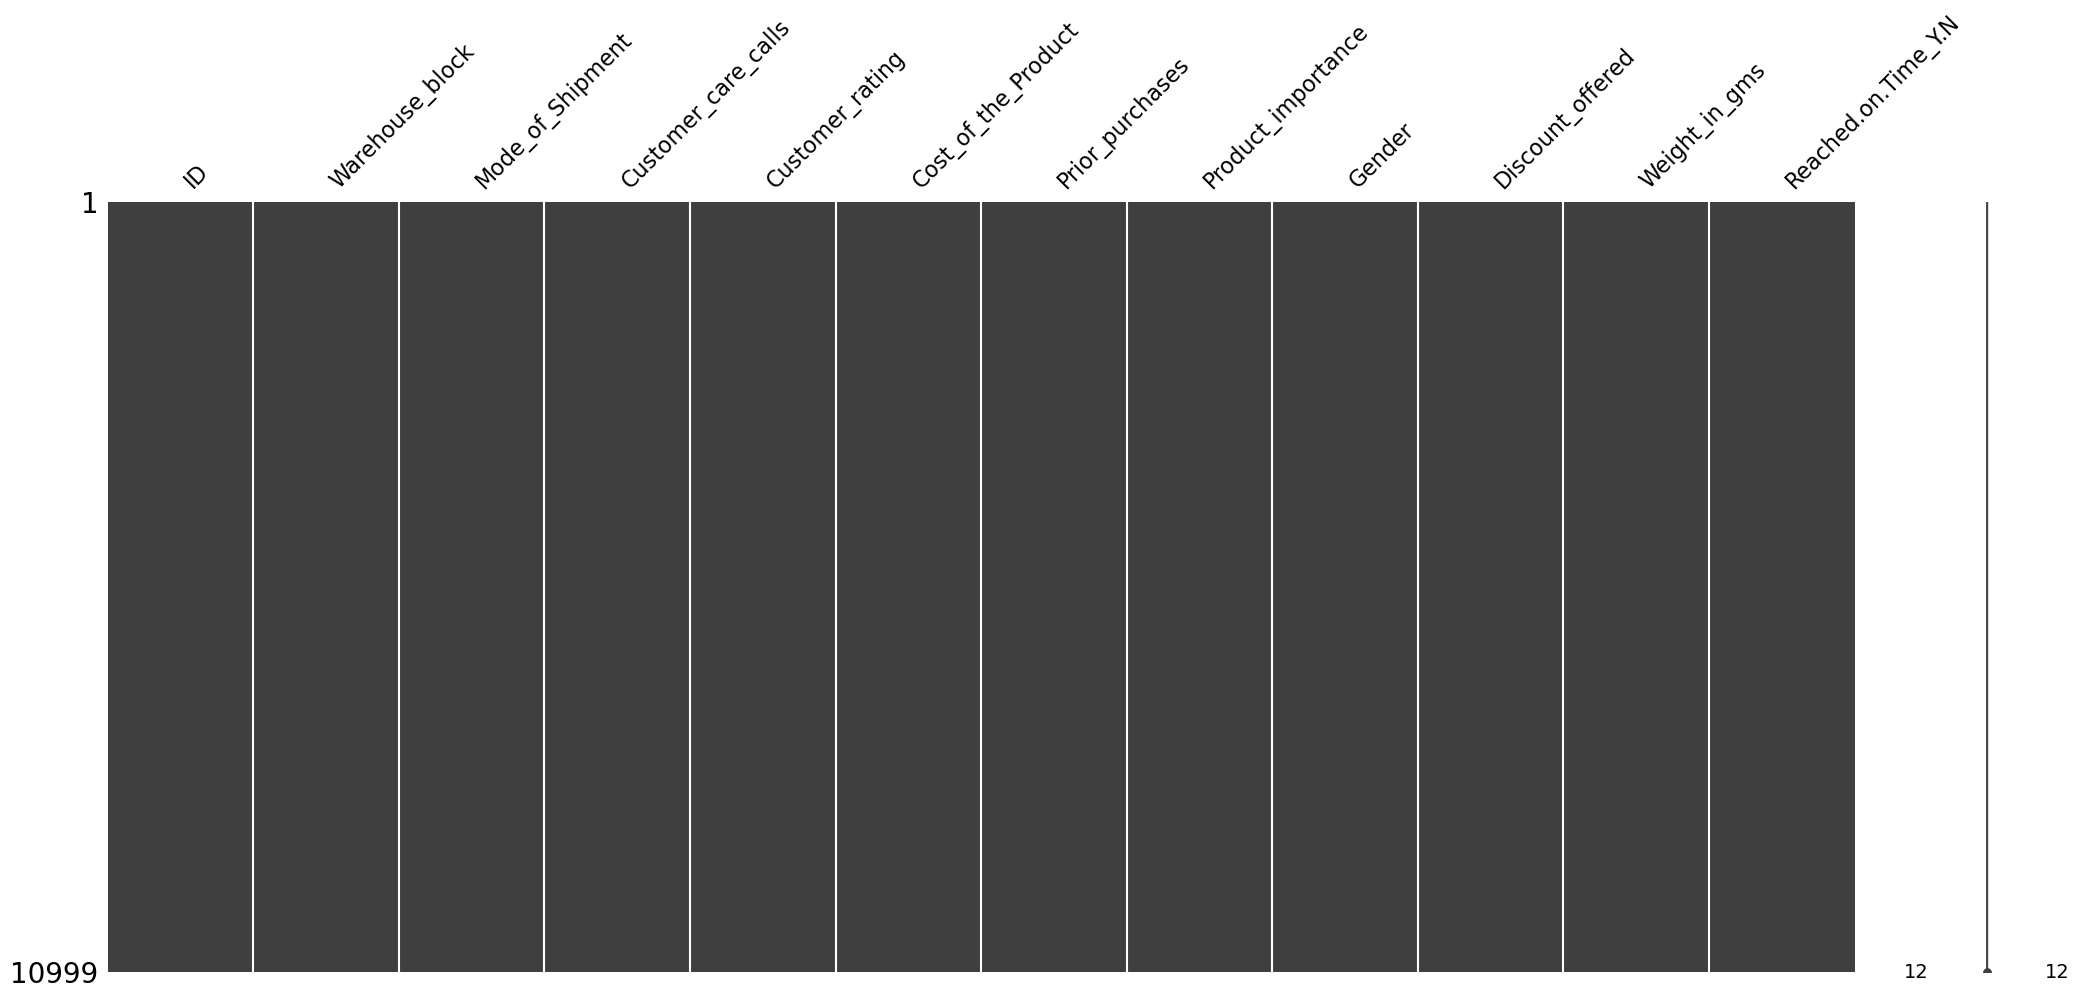

In [8]:
import missingno as msno

msno.matrix(df)

Dari matrix plot diatas dapat dikatakan:
- tidak ada data kosong atau missing value pada semua kolom yang berada pada dataset Online Retail Shipping

In [9]:
df['ID'].nunique()

10999

In [10]:
df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

Terdapat 5 data unik. Namun ada keanehan dari data ini.

Pada online retail shipping ini, terdapat 5 gudang : A, B, C, D dan E. Di data set tidak terdapat terletak pada Gudang E namun ada Gudang F. Gudang F akan digantikan dengan Gudang E.


In [11]:
df['Warehouse_block'] = df['Warehouse_block'].replace({'F':'E'})
df

# function ini untuk mengubah warehouse block F menjadi E

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,E,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,E,Ship,5,2,223,6,medium,M,2,1210,0


In [12]:
df['Warehouse_block'].value_counts()

# Jumlah lokasi ID yg terdapat pada kelima gudang

E    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

Kapasitas untuk gudang A-D sama sekitar 1833-1834 sedangkan gudang E memiliki kapasitas 2x lebih besar (3666).

In [13]:
df.duplicated().sum()

0

Tidak terdapat baris / data yang duplikat

In [14]:
df=df.drop(columns='ID')
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,E,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,E,Ship,5,2,223,6,medium,M,2,1210,0


Kolom ID merupakan primary key pada tabel ini namun bukan variabel penting yang akan digunakan pada data analysis. Maka kolom ID di drop

## Data Analysis

In [15]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,E,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


Kolom ID akan di

Mari kita melihat persebaran data untuk kolom/ variabel numerik kontinu. Variabel numerik kontinu pada Online Retail Shipping adalah Cost_of_the_product, Discount_offered dan Weight_in_gms

**Cost_of_the_Product**

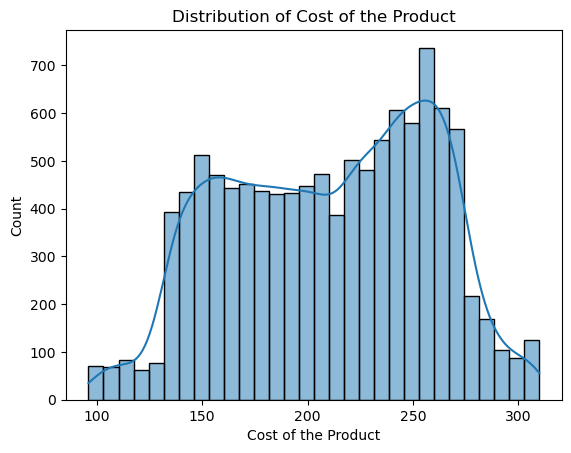

In [16]:
sns.histplot(df['Cost_of_the_Product'],kde=True)
plt.title('Distribution of Cost of the Product')
plt.xlabel('Cost of the Product')
plt.show()

Dilihat pada histplot diatas dapat dikatakan bahwa variabel Cost of the product tidak berdistribusi normal. Namun kita lakukan pengujian uji normalitas data untuk melakukan pengujian secara statistik. Uji normal yang dilakukan adalah Kolmogorov-Smirnov (K-S Test). Dilihat dari jumlah data 10999, KS Test cocok digunakan untuk jumlah data yang banyak.

### Pengecekan secara uji statistik

In [17]:
from scipy.stats import kstest


In [18]:
stat, pvalue = kstest(df['Cost_of_the_Product'],'norm')
pvalue

# conclusion :
if pvalue > 0.05:
    # H0
    print (f'pvalue = {pvalue}. pvalue > 0.05. Gagal menolak H0. Kita mengasumsikan data terdistribusi normal')
else:
    # Ha
    print (f'pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak H0. Kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.0. pvalue < 0.05. Berhasil menolak H0. Kita mengasumsikan data TIDAK terdistribusi normal


**Weight_in_gms**

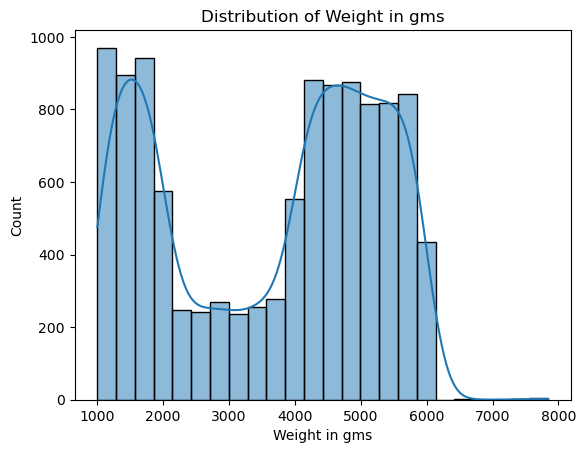

In [19]:
sns.histplot(df['Weight_in_gms'],kde=True)
plt.title('Distribution of Weight in gms')
plt.xlabel('Weight in gms')
plt.show()

Dilihat pada histplot diatas dapat dikatakan bahwa variabel Weight in gms tidak berdistribusi normal. Namun kita lakukan pengujian uji normalitas data untuk melakukan pengujian secara statistik. Uji normal yang dilakukan adalah Kolmogorov-Smirnov (K-S Test). Dilihat dari jumlah data 10999, KS Test cocok digunakan untuk jumlah data yang banyak.

### Pengecekan secara uji statistik

In [20]:
stat, pvalue = kstest(df['Weight_in_gms'],'norm')
pvalue

# conclusion :
if pvalue > 0.05:
    # H0
    print (f'pvalue = {pvalue}. pvalue > 0.05. Gagal menolak H0. Kita mengasumsikan data terdistribusi normal')
else:
    # Ha
    print (f'pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak H0. Kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.0. pvalue < 0.05. Berhasil menolak H0. Kita mengasumsikan data TIDAK terdistribusi normal


**Discount_offered**

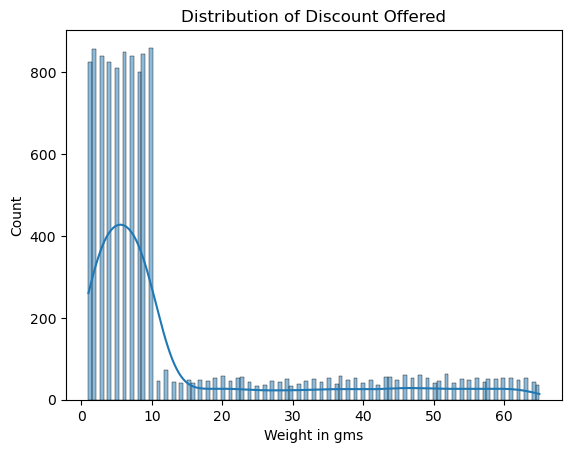

In [21]:
sns.histplot(df['Discount_offered'],kde=True)
plt.title('Distribution of Discount Offered')
plt.xlabel('Weight in gms')
plt.show()

Dilihat pada histplot diatas dapat dikatakan bahwa variabel Weight in gms tidak berdistribusi normal. Namun kita lakukan pengujian uji normalitas data untuk melakukan pengujian secara statistik. Uji normal yang dilakukan adalah Kolmogorov-Smirnov (K-S Test). Dilihat dari jumlah data 10999, KS Test cocok digunakan untuk jumlah data yang banyak.

### Pengecekan secara uji statistik

In [22]:
stat, pvalue = kstest(df['Discount_offered'],'norm')
pvalue

# conclusion :
if pvalue > 0.05:
    # H0
    print (f'pvalue = {pvalue}. pvalue > 0.05. Gagal menolak H0. Kita mengasumsikan data terdistribusi normal')
else:
    # Ha
    print (f'pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak H0. Kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.0. pvalue < 0.05. Berhasil menolak H0. Kita mengasumsikan data TIDAK terdistribusi normal


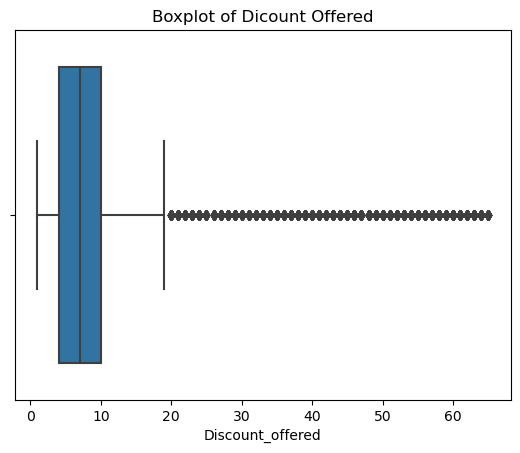

In [23]:
plt.title('Boxplot of Dicount Offered')
sns.boxplot(data=df, x='Discount_offered')
plt.show()

Terdapat outlier pada Data Discount offerend namun saya memilih untuk tidak menghilangkan nilai outlier karena nilai diskon masih wajar (tidak anomali kurang dari 0 % atau lebih dari 100 %) dan cukup banyak

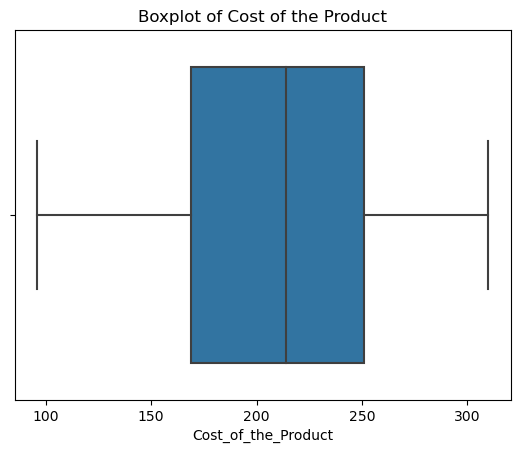

In [24]:
plt.title('Boxplot of Cost of the Product')

sns.boxplot(data=df, x='Cost_of_the_Product')
plt.show()


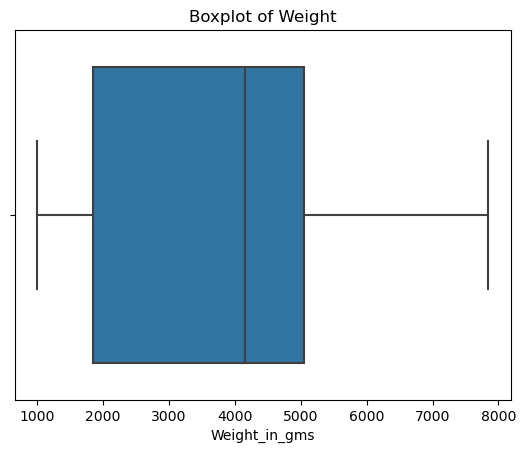

In [25]:
plt.title('Boxplot of Weight')

sns.boxplot(data=df, x='Weight_in_gms')
plt.show()

Lanjut kita melihat nilai korelasi dari antar variable yang terdapat pada dataset Online Retail Shipping

### Correlation

In [ ]:
matrix = np.triu(df.corr())

Memakai method spearman karena data kontinu tidak berdistribusi normal

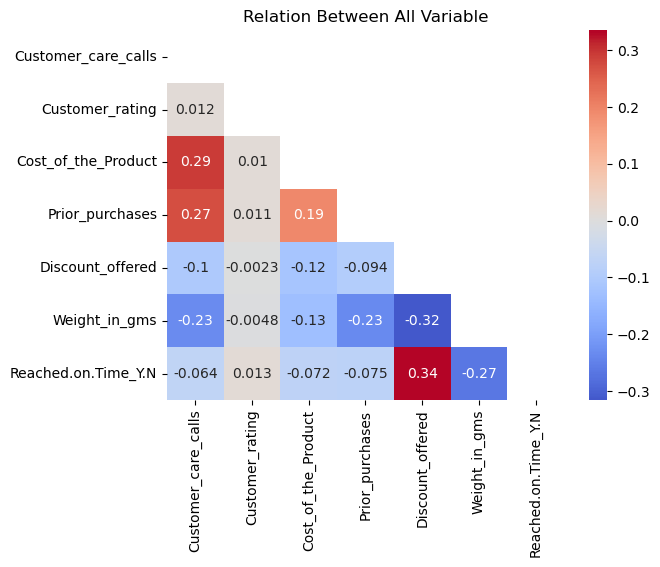

In [ ]:
sns.heatmap(
    data=df.corr(method='spearman'),
    annot=True,
    cmap = 'coolwarm',      
    center = 0,
    mask=matrix )

plt.title('Relation Between All Variable')
plt.show()

### Dari grafik heatmap diatas, dapat disebutkan bahwa :
- Untuk variable Reached on Time, var yang paling mempengaruhi adalah discount offered dan weight in gms
- Hubungan discount offered dengan reached on time berkolerasi Low Correlation Positive. Positive merupakan hubungan yang searah, maka semakin besar nilai discount offered maka akan cenderung semakin telat
- Hubungan weight in gms dengan reached on time berkolerasi Low Correlation Negative. Negative merupakan hubungan kebalikannya, maka semakin besar nilai weight in gms maka akan cenderung tepat waktu

Kita lanjut menganalisa persebaran dari masing-masing variabel

Untuk varibel numerik diskrit dan kategorikal, mari kita lihat persebarannya dengan count plot

In [26]:
columns = list(df.columns)
columns.remove('Cost_of_the_Product')
columns.remove('Discount_offered')
columns.remove('Weight_in_gms')

columns

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Reached.on.Time_Y.N']

In [27]:
len(columns)

8

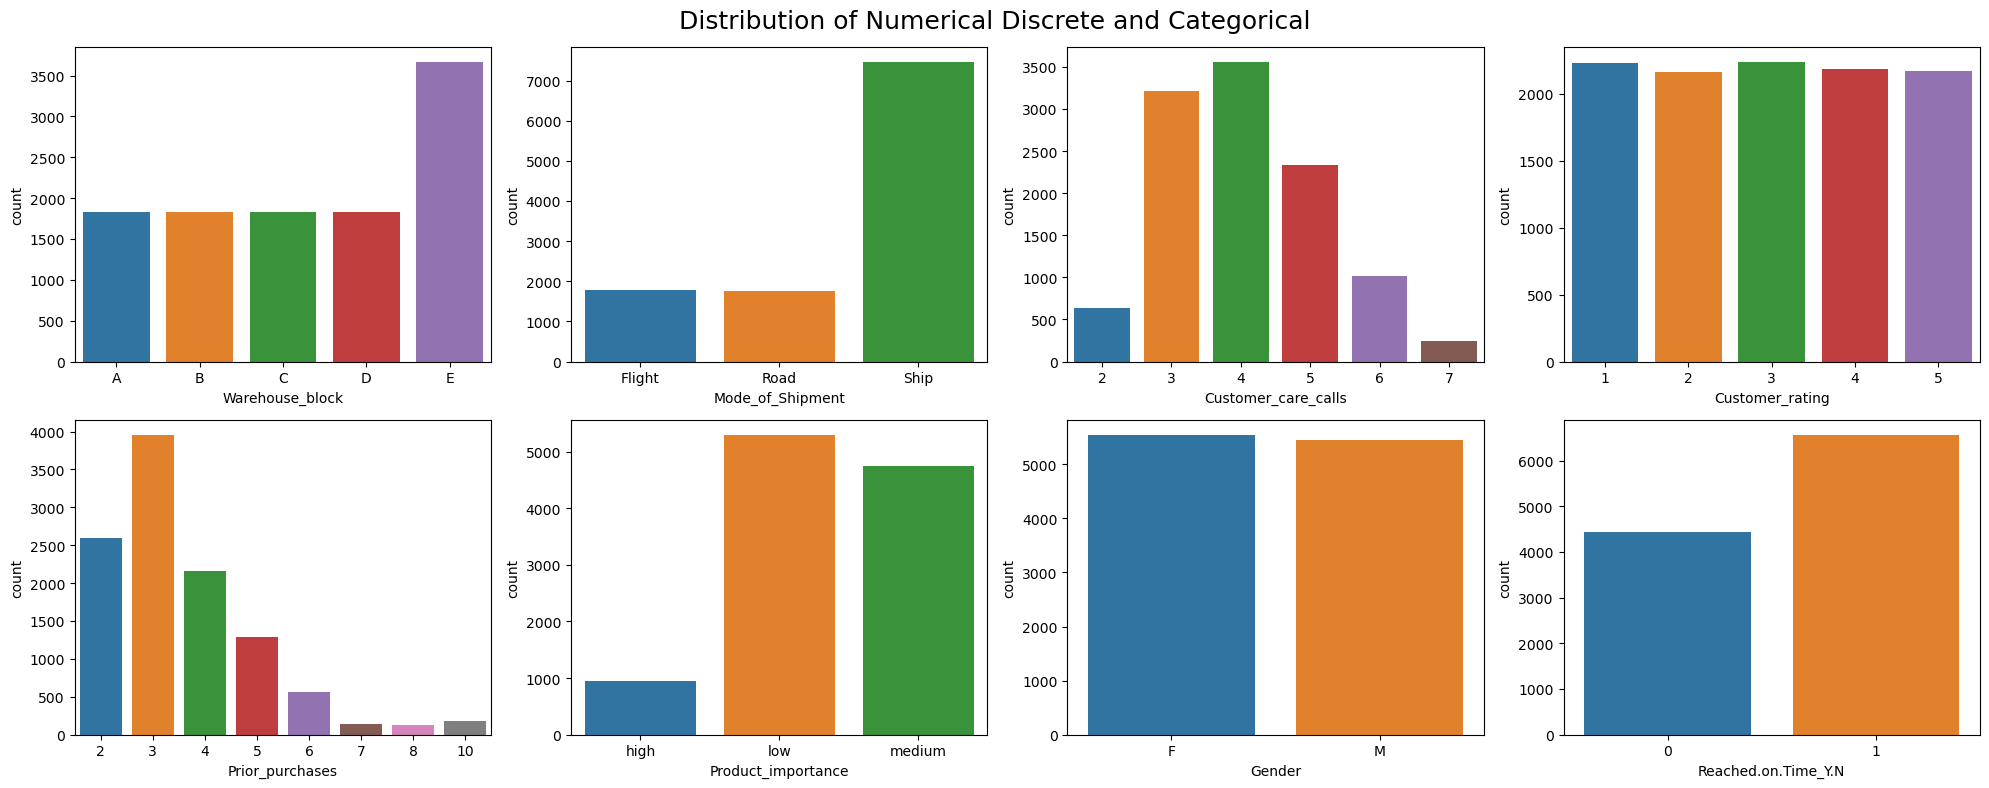

In [28]:
plt.figure(figsize=(20,8))

for i in range(len(columns)):

    ticks_order = sorted(df[columns[i]].unique())

    plt.subplot(2,4, i+1)
    sns.countplot(data=df, x=columns[i],order=ticks_order)

plt.suptitle('Distribution of Numerical Discrete and Categorical',fontsize=18)
plt.tight_layout()

Dari countplot diatas dapat dikatakan bahwa :
- Warehouse_block
    - Proporsi barang yang tersimpan pada warehouse block A, B, C dan D memiliki jumlah yang setara
    - Proporsi barang pada warehouse block E memiliki jumlah 2x lebih banyak dibanding warehouse block lainnya
<br><br>
- Mode_of_shipment
    - Metode pengiriman terbanyak yang digunakan adalah menggunakan jalur laut atau Ship
    - Proporsi metode Flight dan Road memiliki nilai yang setara
<br><br>
- Customer_care_calls
    - Proporsi terbesar jumlah panggilan yang dilakukan pelanggan adalah 4
<br><br>
- Customer_rating
    - Proporsi customer rating 1-5 memiliki proporsi yang hampir setara
<br><br>
- Prior_purchases
    - Proporsi terbanyak pada prior purchases 3
    - Proporsi terkecil pada prior purchases 7,8 dan 10
<br><br>
- Product_importance
    - Product tipe high memiliki proporsi terkecil sekitar 10%
    - Product tipe low dan medium hampir memiliki proporsi yang sama
<br><br>
- Gender
    - Proporsi F dan M setara
<br><br>
- Reached On Time
    - Proporsi 0 (produk tepat waktu sampainya) memiliki proporsi lebih sedikit. Sekitar 40an% produk yang sampai tepat waktu. Sisanya pengiriman produk telat

Mari kita lihat nilai persentase proporsinya

In [29]:
x=pd.DataFrame((round(df['Warehouse_block'].value_counts()/len(df)*100,2)))
x=x.reset_index()
x=x.sort_values('index', ascending=True)
x

,index,Warehouse_block
2,A,16.67
3,B,16.67
4,C,16.67
1,D,16.67
0,E,33.33


In [30]:
x=pd.DataFrame((round(df['Mode_of_Shipment'].value_counts()/len(df)*100,2)))
x=x.reset_index()
x=x.sort_values('index', ascending=True)
x

,index,Mode_of_Shipment
1,Flight,16.16
2,Road,16.00
0,Ship,67.84


In [31]:
x=pd.DataFrame((round(df['Customer_care_calls'].value_counts()/len(df)*100,2)))
x=x.reset_index()
x=x.sort_values('index', ascending=True)
x

,index,Customer_care_calls
4,2,5.80
1,3,29.25
0,4,32.34
2,5,21.17
3,6,9.21
5,7,2.24


In [32]:
x=pd.DataFrame((round(df['Customer_rating'].value_counts()/len(df)*100,2)))
x=x.reset_index()
x=x.sort_values('index', ascending=True)
x

,index,Customer_rating
1,1,20.32
4,2,19.68
0,3,20.36
2,4,19.90
3,5,19.74


In [33]:
x=pd.DataFrame((round(df['Prior_purchases'].value_counts()/len(df)*100,2)))
x=x.reset_index()
x=x.sort_values('index', ascending=True)
x

,index,Prior_purchases
1,2,23.63
0,3,35.96
2,4,19.59
3,5,11.70
4,6,5.10
6,7,1.24
7,8,1.16
5,10,1.62


In [34]:
x=pd.DataFrame((round(df['Product_importance'].value_counts()/len(df)*100,2)))
x=x.reset_index()
x=x.sort_values('index', ascending=True)
x

,index,Product_importance
2,high,8.62
0,low,48.16
1,medium,43.22


In [35]:
x=pd.DataFrame((round(df['Gender'].value_counts()/len(df)*100,2)))
x=x.reset_index()
x=x.sort_values('index', ascending=True)
x

,index,Gender
0,F,50.41
1,M,49.59


In [36]:
x=pd.DataFrame((round(df['Reached.on.Time_Y.N'].value_counts()/len(df)*100,2)))
x=x.reset_index()
x=x.sort_values('index', ascending=True)
x

,index,Reached.on.Time_Y.N
1,0,40.33
0,1,59.67


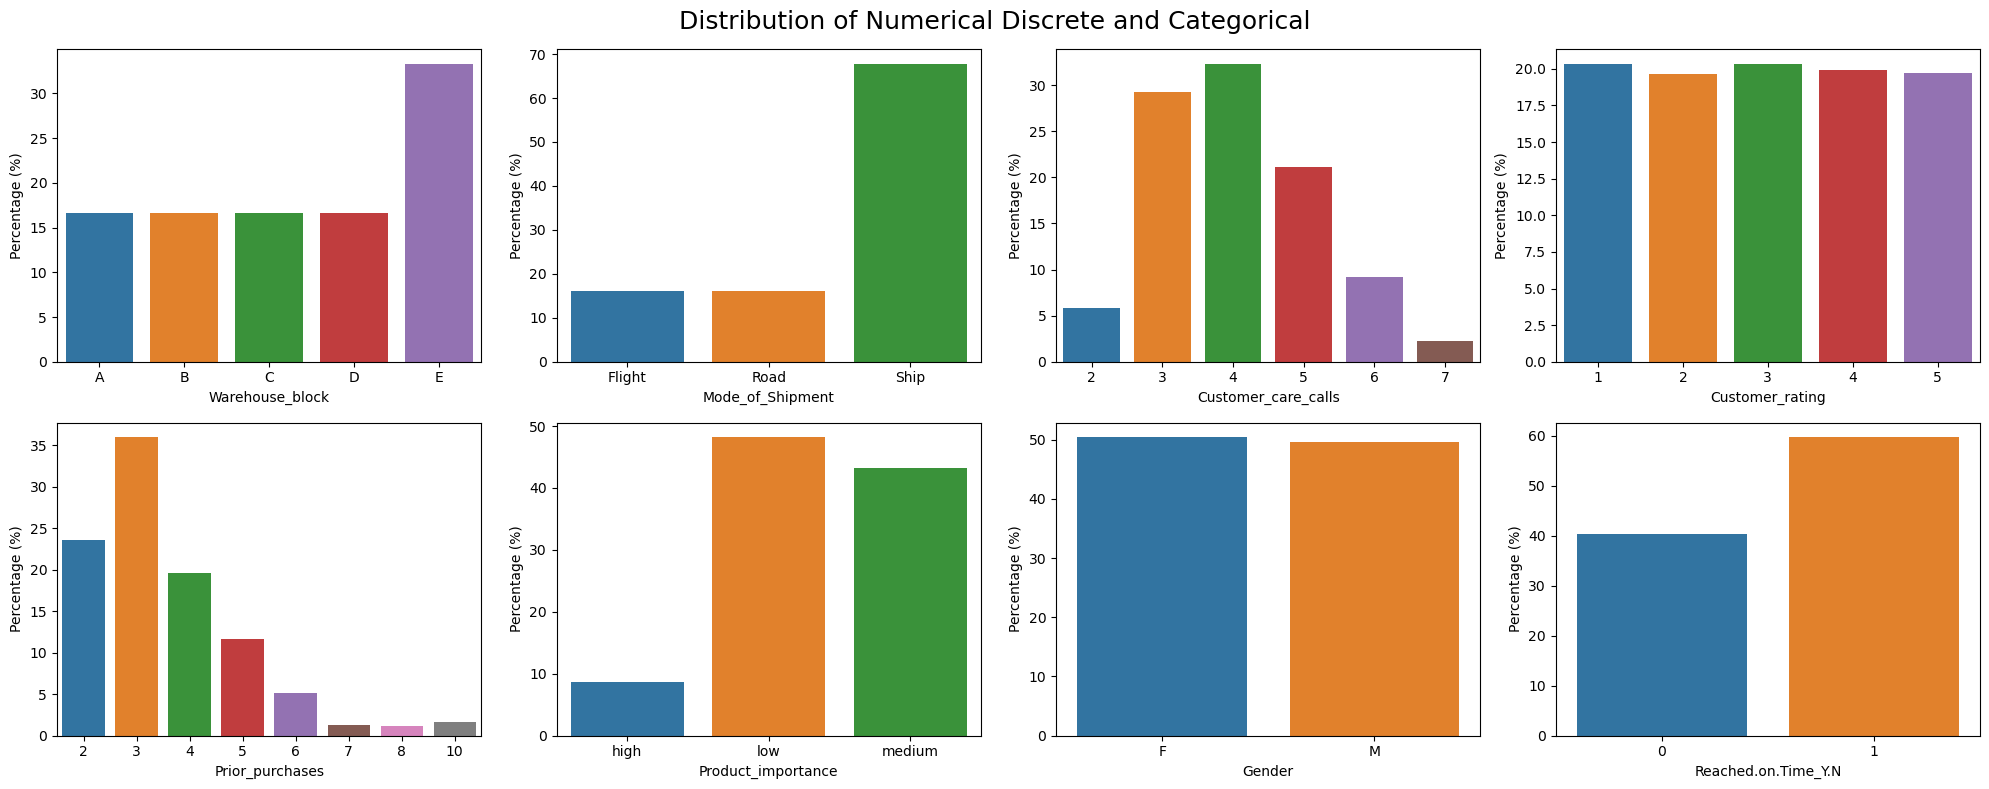

In [37]:
plt.figure(figsize=(20,8))

for i in range(len(columns)):

    x=pd.DataFrame((round(df[columns[i]].value_counts()/len(df)*100,2)))
    x=x.reset_index()
    x=x.sort_values('index', ascending=True)
    x

    plt.subplot(2,4, i+1)
    
    sns.barplot(data=x, x='index', y=columns[i])
    plt.ylabel('Percentage (%)')
    plt.xlabel(columns[i])

plt.suptitle('Distribution of Numerical Discrete and Categorical',fontsize=18)
plt.tight_layout()



Grafik barplot ini sama seperti count plot pada sebelumnya namun ada untuk axis y diubah menjadi persentase nya. Untuk nilai rinci persentasenya, saya plot pada dataframe diatas

## Reached On Time Analysis

## Analisa Variable Numerical

Mari kita membandingkan variabel lain dengan variabel Reached on Time

In [38]:
num_feature = ['Customer_care_calls','Customer_rating', 'Cost_of_the_Product','Prior_purchases', 'Discount_offered', 'Weight_in_gms']
num_feature

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

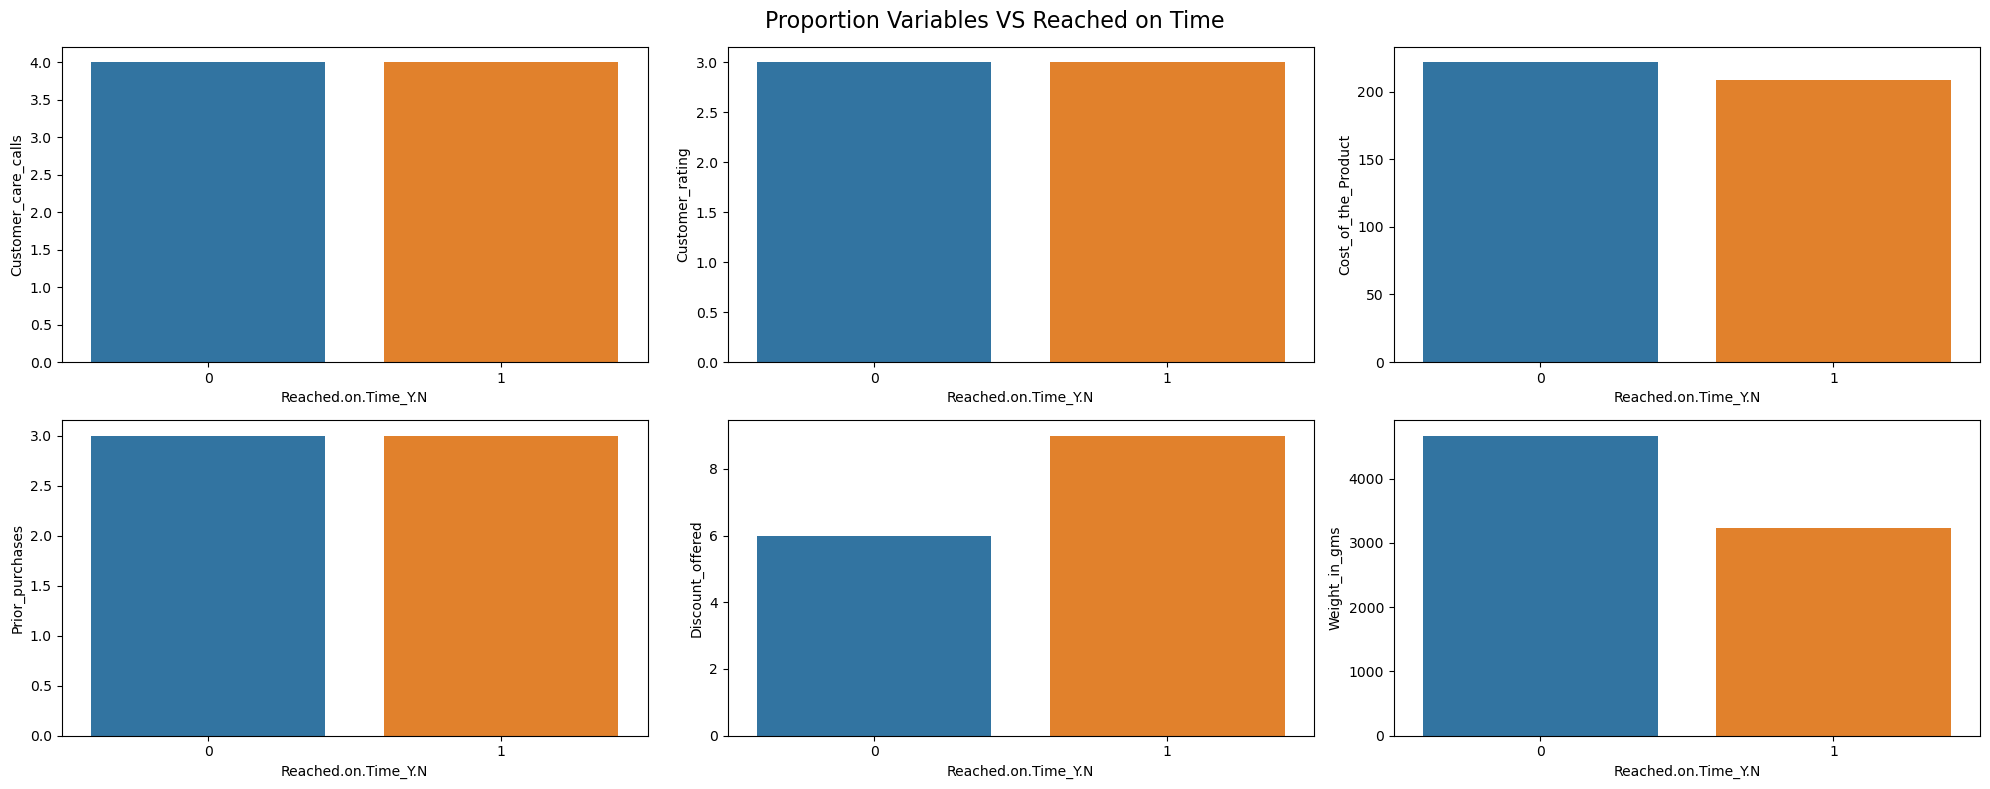

In [39]:
plt.figure(figsize=(20,8))

for col in range(len(num_feature)):

    plt.subplot(2,3, col+1)
    sns.barplot(data=df, x='Reached.on.Time_Y.N', y=num_feature[col], ci=0, estimator=np.median)

plt.suptitle('Proportion Variables VS Reached on Time', fontsize=16)
plt.tight_layout()

Berdasarkan barplot dengan estimator np.median, dapat dikatakan bahwa :
- nilai median cusomter care calls yang barangnya sampai tepat waktu dan tidak tepat waktu mempunyai nilai median yang sama yaitu 4.
- nilai median customer rating yang barangnya sampai tepat waktu dan tidak tepat waktu mempunyai nilai median yang sama yaitu 3.
- nilai median harga produk yang barangnya sampai tepat waktu lebih besar daripada barangnya yang sampai tidak tepat waktu.
- nilai median prior purchases yang barangnya sampai tepat waktu dan tidak tepat waktu mempunyai nilai median yang sama yaitu 3
- nilai median discount offerend yang barangnya sampai tepat waktu adalah 6 % sedangkan nilai median discount offered yang barangnya sampai tidak tepat waktu adalah 8 %. 
- nilai median berat produk yang sampai tepat waktu mendekati nilai 5000 sedangkan nilai median berat produk yang sampai tidak tepat waktu sekitar 3000.


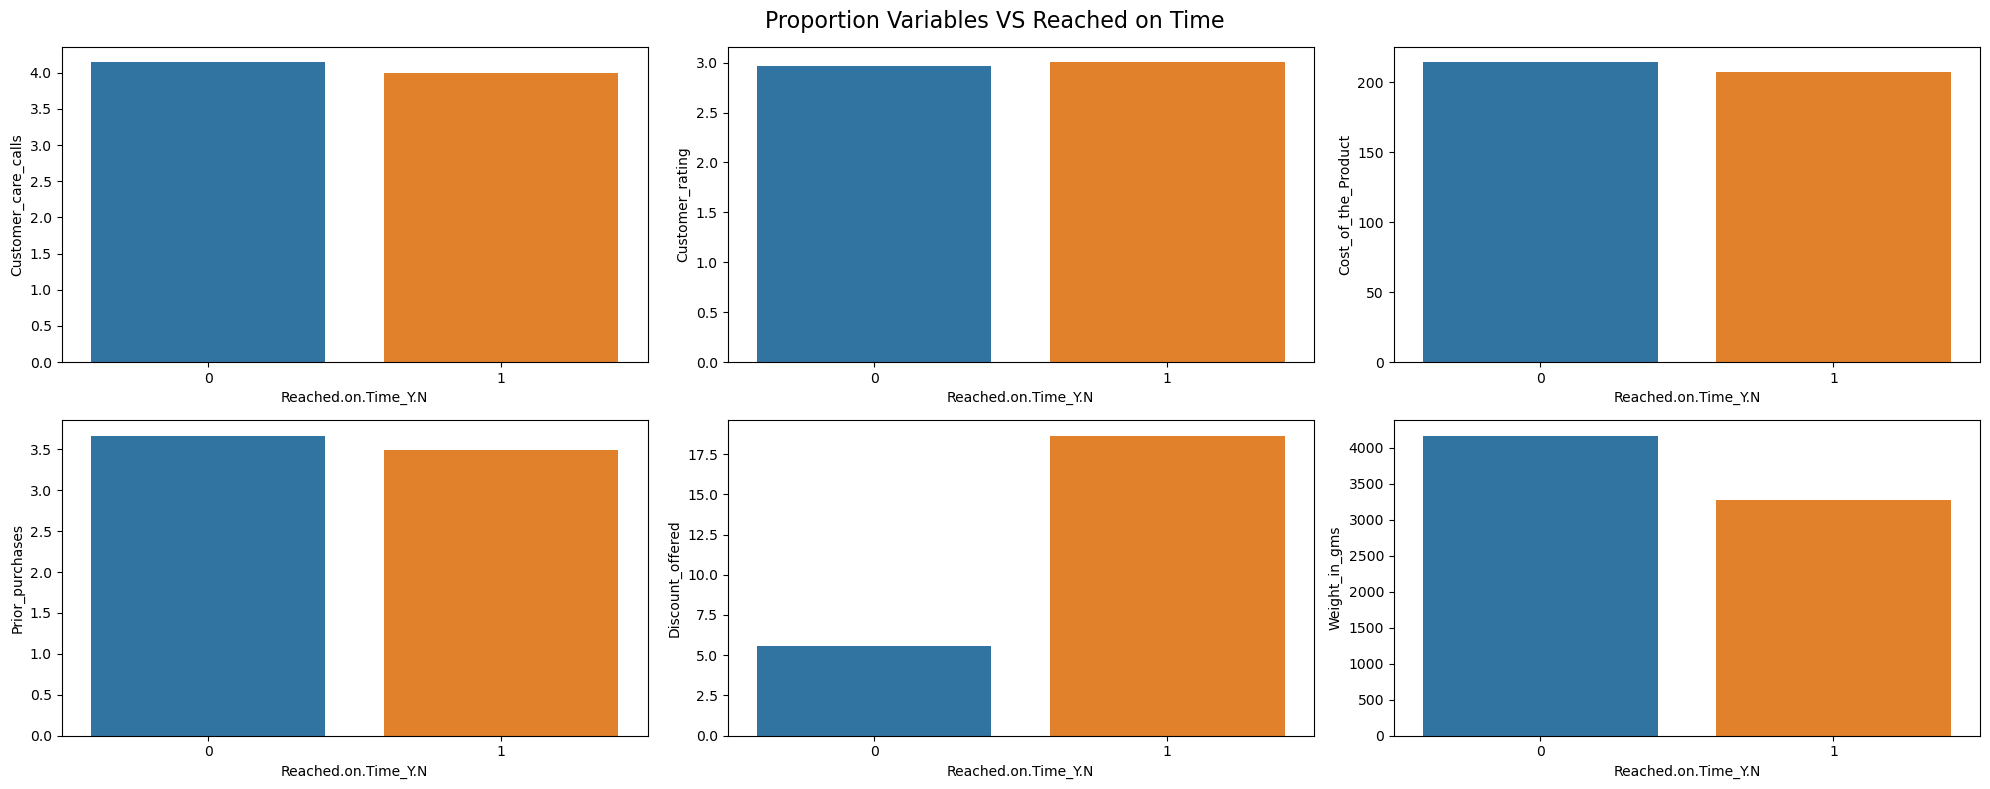

In [40]:
plt.figure(figsize=(20,8))

for col in range(len(num_feature)):

    plt.subplot(2,3, col+1)
    sns.barplot(data=df, x='Reached.on.Time_Y.N', y=num_feature[col], ci=0, estimator=np.mean)

plt.suptitle('Proportion Variables VS Reached on Time', fontsize=16)
plt.tight_layout()

Berdasarkan barplot dengan estimator np.mean, dapat dikatakan bahwa :
- nilai mean customer care calls yang barangnya sampai tepat waktu lebih besar daripada nilai mean customer care calls tidak tepat waktu. Walau nilai perbedaan rata-ratanya tidak berbeda jauh
- nilai mean customer rating yang barangnya sampai tepat waktu dan tidak tepat waktu mempunyai nilai mean yang sama yaitu 3.
- nilai mean cost of the products yang barangnya sampai tepat waktu lebih besar daripada nilai mean cost of the products tidak tepat waktu. Walau nilai perbedaan rata-ratanya tidak berbeda jauh
- nilai mean prior purchases yang barangnya sampai tepat waktu lebih besar daripada nilai mean prior purchases tidak tepat waktu. Walau nilai perbedaan rata-ratanya tidak berbeda jauh
- nilai mean discount offered yang barangnya sampai tepat waktu adalah 5 % sedangkan nilai mean discount offered yang barangnya sampai tidak tepat waktu adalah 17.5 % 
- nilai mean berat produk yang sampai tepat waktu mendekati nilai 4000 sedangkan nilai mean berat produk yang sampai tidak tepat waktu sekitar 3000.


Barplot dari mean ini hanya untuk melihat penggambarannya saja namun secara kelesuruhan yang akan dilihat berdasarkan nilai tengah atau mediannya.

Untuk memastikan apakah produk yang sampai tepat waktu dan produk yang sampai tidak tepat waktu memiliki nilai customer care calls yang sama, maka akan dilakukan pengujian statistik. Tidak hanya variabel customer care calls saja, keenam variabel numerik diatas akan dilakukan pengujian juga.

## Uji Statistik Variable Categorical dengan Variable Numerical

Mari kita melakukan uji keterkaitan antara variable categorical (reached on time) dengan variable numerikal.  Uji yang digunakan adalah Mann Whitney Test. Chi Square Test digunakan untuk menguji apakah ada perbedaan mean rank dari kedua categorical ini. Ada 6 variabel numerical yang akan dibandingkan dengan variable Reached on Time yaitu customer_care_calls, customer_rating, cost_of_the_product, prior_purchases, discount_offered dan weight in gms. Dilakukannya uji ini untuk mengetahui apakah ada keterkaitan dari variabel lainnya dengan variabel Reached on Time. 

Untuk langkah-langkah ada dibawah ini :

### Mann Whitney Reached on Time vs Customer Care Calls

Hypothesis
- Ho: Mean rank jumlah panggilan pelanggan yang produk sampai tepat waktu = Mean rank jumlah panggilan pelanggan yang produk sampai tidak tepat waktu
- Ha: Mean rank jumlah panggilan pelanggan yang produk sampai tepat waktu != Mean rank jumlah panggilan pelanggan yang produk sampai tidak tepat waktu


In [41]:
df[['Reached.on.Time_Y.N','Customer_care_calls']]

,Reached.on.Time_Y.N,Customer_care_calls
0,1,4
1,1,4
2,1,2
3,1,3
4,1,2
...,...,...
10994,1,4
10995,0,4
10996,0,5
10997,0,5


In [42]:
from scipy.stats import mannwhitneyu


In [43]:
stat, pvalue = mannwhitneyu(
    df[df['Reached.on.Time_Y.N']==0]['Customer_care_calls'],
    df[df['Reached.on.Time_Y.N']==1]['Customer_care_calls'],
    
)

pvalue

1.5680985180123914e-11

In [44]:
# conclusion

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa mean rank jumlah panggilan pelanggan yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank jumlah panggilan pelanggan yang produk sampai tidak tepat waktu.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank jumlah panggilan pelanggan yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank jumlah panggilan pelanggan yang produk sampai tidak tepat waktu.
    ''')


    pvalue = 1.5680985180123914e-11. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank jumlah panggilan pelanggan yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank jumlah panggilan pelanggan yang produk sampai tidak tepat waktu.
    


Berdasarkan hasil Mann Whitney test dapat ditarik kesimpulan bahwa pada data Online Retail Shipping, <br><br>
**Mean rank jumlah panggilan pelanggan yang produk sampai tepat waktu tidak memiliki nilai mean rank yang tidak sama dengan jumlah panggilan pelanggan yang produk sampai tidak tepat waktu**

### Mann Whitney Reached on Time vs Customer Rating

Hypothesis
- Ho: Mean rank customer rating yang produk sampai tepat waktu = Mean rank customer rating yang produk sampai tidak tepat waktu
- Ha: Mean rank customer rating yang produk sampai tepat waktu != Mean rank customer rating yang produk sampai tidak tepat waktu


In [45]:
df[['Reached.on.Time_Y.N','Customer_rating']]

,Reached.on.Time_Y.N,Customer_rating
0,1,2
1,1,5
2,1,2
3,1,3
4,1,2
...,...,...
10994,1,1
10995,0,1
10996,0,4
10997,0,2


In [46]:
from scipy.stats import mannwhitneyu


In [47]:
stat, pvalue = mannwhitneyu(
    df[df['Reached.on.Time_Y.N']==0]['Customer_rating'],
    df[df['Reached.on.Time_Y.N']==1]['Customer_rating'],
    
)

pvalue

0.16923795777414774

In [48]:
# conclusion

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa mean rank customer rating yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank customer rating yang produk sampai tidak tepat waktu.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank customer rating yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank customer rating yang produk sampai tidak tepat waktu.
    ''')


    pvalue = 0.16923795777414774. pvalue > 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa mean rank customer rating yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank customer rating yang produk sampai tidak tepat waktu.
    


Berdasarkan hasil Mann Whitney test dapat ditarik kesimpulan bahwa pada data Online Retail Shipping,<br>
 **Mean rank customer rating yang produk sampai tepat waktu tidak memiliki nilai mean rank yang SAMA dengan customer rating yang produk sampai tidak tepat waktu**

### Mann Whitney Reached on Time vs Cost of the Products

Hypothesis
- Ho: Mean rank Harga Pembuatan Produk yang produk sampai tepat waktu = Mean rank Harga Pembuatan Produk yang produk sampai tidak tepat waktu
- Ha: Mean rank Harga Pembuatan Produk yang produk sampai tepat waktu != Mean rank Harga Pembuatan Produk yang produk sampai tidak tepat waktu


In [49]:
df[['Reached.on.Time_Y.N','Cost_of_the_Product']]

,Reached.on.Time_Y.N,Cost_of_the_Product
0,1,177
1,1,216
2,1,183
3,1,176
4,1,184
...,...,...
10994,1,252
10995,0,232
10996,0,242
10997,0,223


In [50]:
stat, pvalue = mannwhitneyu(
    df[df['Reached.on.Time_Y.N']==0]['Cost_of_the_Product'],
    df[df['Reached.on.Time_Y.N']==1]['Cost_of_the_Product'],
    
)

pvalue

4.881518157474724e-14

In [51]:
# conclusion

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa mean rank harga pembuatan produk yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank harga pembuatan produk yang produk sampai tidak tepat waktu.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank harga pembuatan produk yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank harga pembuatan produk yang produk sampai tidak tepat waktu.
    ''')


    pvalue = 4.881518157474724e-14. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank harga pembuatan produk yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank harga pembuatan produk yang produk sampai tidak tepat waktu.
    


Berdasarkan hasil Mann Whitney test dapat ditarik kesimpulan bahwa pada data Online Retail Shipping, <br><br>
**Mean rank harga pembuatan produk yang produk sampai tepat waktu tidak memiliki nilai mean rank yang TIDAK SAMA dengan Harga pembuatan produk yang produk sampai tidak tepat waktu**

### Mann Whitney Reached on Time vs Prior Purchases

Hypothesis
- Ho: Mean rank jumlah pembelian sebelumnya yang produk sampai tepat waktu = Mean rank jumlah pembelian sebelumnya yang produk sampai tidak tepat waktu
- Ha: Mean rank jumlah pembelian sebelumnya yang produk sampai tepat waktu != Mean rank jumlah pembelian sebelumnya yang produk sampai tidak tepat waktu


In [52]:
df[['Reached.on.Time_Y.N','Prior_purchases']]

,Reached.on.Time_Y.N,Prior_purchases
0,1,3
1,1,2
2,1,4
3,1,4
4,1,3
...,...,...
10994,1,5
10995,0,5
10996,0,5
10997,0,6


In [53]:
stat, pvalue = mannwhitneyu(
    df[df['Reached.on.Time_Y.N']==0]['Prior_purchases'],
    df[df['Reached.on.Time_Y.N']==1]['Prior_purchases'],
    
)

pvalue

4.96018908968398e-15

In [54]:
# conclusion

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa mean rank jumlah pembelian sebelumnya yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank jumlah pembelian sebelumnya yang produk sampai tidak tepat waktu.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank jumlah pembelian sebelumnya yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank jumlah pembelian sebelumnya yang produk sampai tidak tepat waktu.
    ''')


    pvalue = 4.96018908968398e-15. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank jumlah pembelian sebelumnya yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank jumlah pembelian sebelumnya yang produk sampai tidak tepat waktu.
    


Berdasarkan hasil Mann Whitney test dapat ditarik kesimpulan bahwa pada data Online Retail Shipping, <br><br>
**jumlah pembelian sebelumnya yang produk sampai tepat waktu tidak memiliki nilai mean rank yang TIDAK SAMA dengan jumlah pembelian sebelumnya yang produk sampai tidak tepat waktu**

### Mann Whitney Reached on Time vs Discount offered

Hypothesis
- Ho: Mean rank diskon yang diberikan yang produk sampai tepat waktu = Mean rank diskon yang diberikan yang produk sampai tidak tepat waktu
- Ha: Mean rank diskon yang diberikan yang produk sampai tepat waktu != Mean rank diskon yang diberikan yang produk sampai tidak tepat waktu


In [55]:
df[['Reached.on.Time_Y.N','Discount_offered']]

,Reached.on.Time_Y.N,Discount_offered
0,1,44
1,1,59
2,1,48
3,1,10
4,1,46
...,...,...
10994,1,1
10995,0,6
10996,0,4
10997,0,2


In [56]:
stat, pvalue = mannwhitneyu(
    df[df['Reached.on.Time_Y.N']==0]['Discount_offered'],
    df[df['Reached.on.Time_Y.N']==1]['Discount_offered'],
    
)

pvalue

1.4739755397888628e-270

In [57]:
# conclusion

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa mean rank diskon yang diberikan yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank diskon yang diberikan yang produk sampai tidak tepat waktu.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank diskon yang diberikan yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank diskon yang diberikan yang produk sampai tidak tepat waktu.
    ''')


    pvalue = 1.4739755397888628e-270. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank diskon yang diberikan yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank diskon yang diberikan yang produk sampai tidak tepat waktu.
    


Berdasarkan hasil Mann Whitney test dapat ditarik kesimpulan bahwa pada data Online Retail Shipping, <br><br>
**mean rank diskon yang diberikan yang produk sampai tepat waktu tidak memiliki nilai mean rank yang TIDAK SAMA dengan diskon yang diberikan yang produk sampai tidak tepat waktu**

### Mann Whitney Reached on Time vs Weight

Hypothesis
- Ho: Mean rank berat produk yang produk sampai tepat waktu = Mean rank berat produk yang produk sampai tidak tepat waktu
- Ha: Mean rank berat produk yang produk sampai tepat waktu != Mean rank berat produk yang produk sampai tidak tepat waktu


In [58]:
df[['Reached.on.Time_Y.N','Weight_in_gms']]

,Reached.on.Time_Y.N,Weight_in_gms
0,1,1233
1,1,3088
2,1,3374
3,1,1177
4,1,2484
...,...,...
10994,1,1538
10995,0,1247
10996,0,1155
10997,0,1210


In [59]:
stat, pvalue = mannwhitneyu(
    df[df['Reached.on.Time_Y.N']==0]['Weight_in_gms'],
    df[df['Reached.on.Time_Y.N']==1]['Weight_in_gms'],
    
)

pvalue

3.398797458174781e-171

In [60]:
# conclusion

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 
    Kita TIDAK punya cukup bukti bahwa mean rank berat produk yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank berat produk yang produk sampai tidak tepat waktu.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank berat produk yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank berat produk yang produk sampai tidak tepat waktu.
    ''')


    pvalue = 3.398797458174781e-171. pvalue <= 0.05. Reject Ho. 
    Kita punya cukup bukti bahwa mean rank berat produk yang produk sampai tepat waktu 
    TIDAK SAMA DENGAN mean rank berat produk yang produk sampai tidak tepat waktu.
    


Berdasarkan hasil Mann Whitney test dapat ditarik kesimpulan bahwa pada data Online Retail Shipping, <br><br>
**Mean rank berat produk yang produk sampai tepat waktu tidak memiliki nilai mean rank yang TIDAK SAMA dengan berat produk yang produk sampai tidak tepat waktu**

**Dari hasil uji Mann Whitney test dilakukan dapat dikatakan bahwa : Hanya satu dari enam variable numerical yang memiliki nilai mean rank produk yang sampai tepat waktu sama dengan nilai mean rank produk yang sampai tidak tepat waktu. Variable tersebut adalah customer rating**

In [61]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## Analisa Variable Categorical dengan Hue Reached on Time

mari kita lakukan peninjauan lebih lanjut mengenai jumlah variabel categorical namun dibandinkan dengan variabel reached on time yang menjadi objektif dari masalah. sebelumnya kita sudah membuat count plot dari semua variabel categorical. sekarang kita ingin melihat bagaimana persebarannya jika dibagi ke dalam kategori barang yang sampai tepat waktu (0) dan barang yang sampai tidak tepat waktu (1)

In [62]:
cat_feature = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

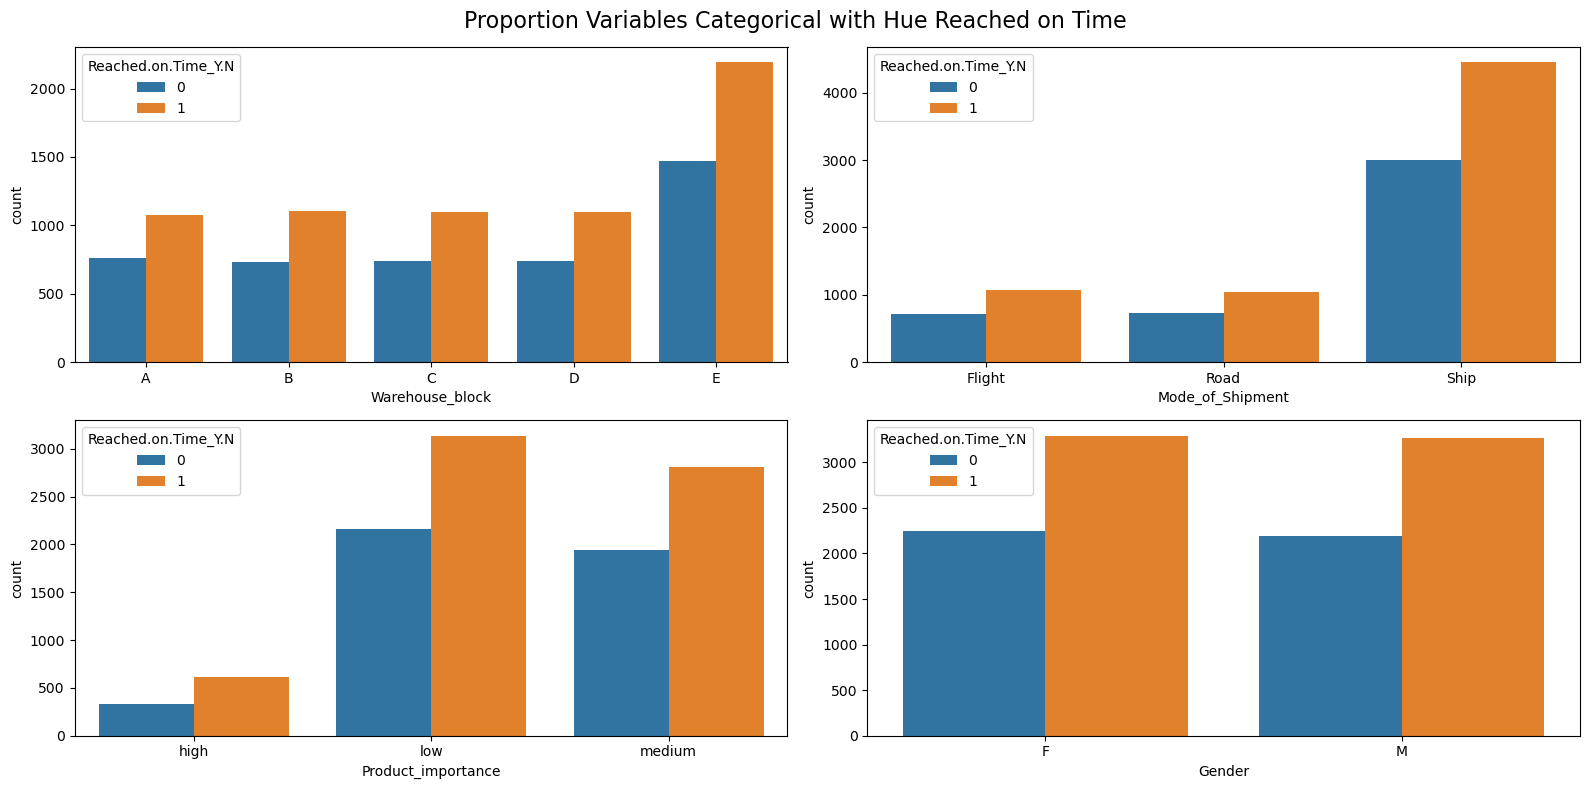

In [63]:
plt.figure(figsize=(16,8))

for col in range(len(cat_feature)):
    hue_order = sorted(df[cat_feature[col]].unique())

    plt.subplot(2,2, col+1)
    sns.countplot(data=df, x=cat_feature[col], hue='Reached.on.Time_Y.N',order=hue_order)

plt.suptitle('Proportion Variables Categorical with Hue Reached on Time', fontsize=16)
plt.tight_layout()

Dari grafik proporsi ditas, dapat dikatakan bahwa :
- Secara keseluruhan semua variable kategorikal ini memiliki perbandingan proporsi antara barang yang sampai tepat waktu dengan barang yang sampai tidak tepat waktu yang sama.

Untuk lebih rinci berapa persentasenya, dibawah ini saya membuat pivot tablenya

### Warehouse block vs Reached On Time

In [64]:
df.groupby(['Warehouse_block']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'})

,Total Shipping
Warehouse_block,
A,1833
B,1833
C,1833
D,1834
E,3666


In [65]:
df_shipping_by_warehouse=df.groupby(['Warehouse_block']).sum()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Number Not On Time'}).join(df.groupby(['Warehouse_block']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'}))
df_shipping_by_warehouse

,Number Not On Time,Total Shipping
Warehouse_block,,
A,1075,1833
B,1104,1833
C,1094,1833
D,1096,1834
E,2194,3666


In [66]:
df_shipping_by_warehouse['Number On Time']=df_shipping_by_warehouse['Total Shipping']-df_shipping_by_warehouse['Number Not On Time']
df_shipping_by_warehouse[['Number Not On Time','Number On Time','Total Shipping']]

,Number Not On Time,Number On Time,Total Shipping
Warehouse_block,,,
A,1075,758,1833
B,1104,729,1833
C,1094,739,1833
D,1096,738,1834
E,2194,1472,3666


In [67]:
df_shipping_by_warehouse['Percentage Not On Time']=df_shipping_by_warehouse['Number Not On Time']/df_shipping_by_warehouse['Total Shipping']*100
df_shipping_by_warehouse['Percentage On Time']=df_shipping_by_warehouse['Number On Time']/df_shipping_by_warehouse['Total Shipping']*100
df_shipping_by_warehouse

,Number Not On Time,Total Shipping,Number On Time,Percentage Not On Time,Percentage On Time
Warehouse_block,,,,,
A,1075,1833,758,58.647027,41.352973
B,1104,1833,729,60.229133,39.770867
C,1094,1833,739,59.683579,40.316421
D,1096,1834,738,59.760087,40.239913
E,2194,3666,1472,59.847245,40.152755


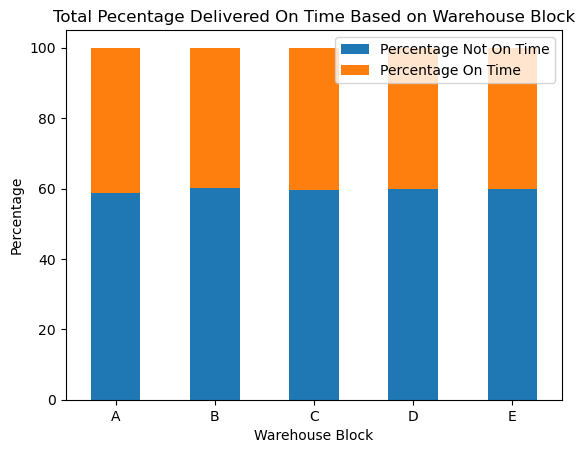

In [68]:
ax = df_shipping_by_warehouse[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered On Time Based on Warehouse Block')
plt.xlabel('Warehouse Block')
plt.xticks(rotation=0)
plt.ylabel('Percentage');

Dari grafik stacked barplot diatas, dapat dikatakan bahwa :
- Proporsi barang yang sampai tepat waktu dan barang yang sampai tidak tepat waktu memiliki proporsi yang berimbang pada kelima warehouse block
- Proporsi barang yang sampai tidak tepat waktu sekitar 58-60 % , proporsi barang yang sampai tepat waktu sekitar 39-41 %
- Sesuai dengan proporsi persebaran data Reached on time yang kita sudah hitung sebelumnya. Proporsi barang yang sampai tepat waktu adalah 40,3 % dan proporsi barang yang sampai tidak tepat waktu 59,7%

### Mode_of_Shipment vs Reached.on.Time_Y.N

In [69]:
df_delivery_shipping=df.groupby(['Mode_of_Shipment']).sum()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Number Not On Time'}).join(df.groupby(['Mode_of_Shipment']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'}))
df_delivery_shipping

,Number Not On Time,Total Shipping
Mode_of_Shipment,,
Flight,1069,1777
Road,1035,1760
Ship,4459,7462


In [70]:
df_delivery_shipping['Number On Time']=df_delivery_shipping['Total Shipping']-df_delivery_shipping['Number Not On Time']
df_delivery_shipping[['Number Not On Time','Number On Time','Total Shipping']]

,Number Not On Time,Number On Time,Total Shipping
Mode_of_Shipment,,,
Flight,1069,708,1777
Road,1035,725,1760
Ship,4459,3003,7462


In [71]:
df_delivery_shipping['Percentage Not On Time']=df_delivery_shipping['Number Not On Time']/df_delivery_shipping['Total Shipping']*100
df_delivery_shipping['Percentage On Time']=df_delivery_shipping['Number On Time']/df_delivery_shipping['Total Shipping']*100
df_delivery_shipping

,Number Not On Time,Total Shipping,Number On Time,Percentage Not On Time,Percentage On Time
Mode_of_Shipment,,,,,
Flight,1069,1777,708,60.157569,39.842431
Road,1035,1760,725,58.806818,41.193182
Ship,4459,7462,3003,59.756098,40.243902


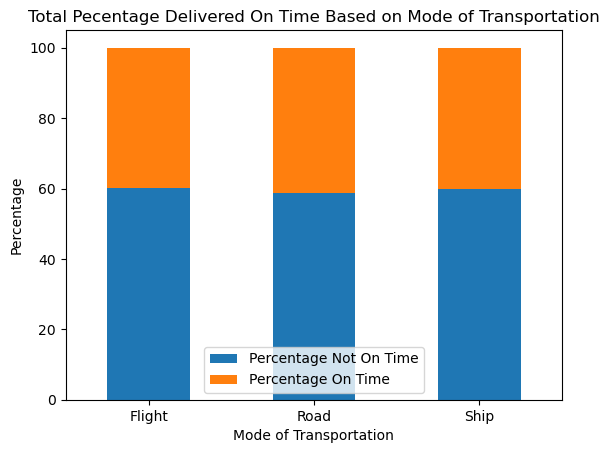

In [72]:
ax = df_delivery_shipping[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered On Time Based on Mode of Transportation')
plt.xticks(rotation=0)
plt.xlabel('Mode of Transportation')
plt.ylabel('Percentage');

Dari grafik stacked barplot diatas, dapat dikatakan bahwa :
- Proporsi barang yang sampai tepat waktu dan barang yang sampai tidak tepat waktu memiliki proporsi yang berimbang pada ketiga moda transportasi.
- Proporsi barang yang sampai tidak tepat waktu sekitar 58-60 % , proporsi barang yang sampai tepat waktu sekitar 39-41 %
- Sesuai dengan proporsi persebaran data Reached on time yang kita sudah hitung sebelumnya. Proporsi barang yang sampai tepat waktu adalah 40,3 % dan proporsi barang yang sampai tidak tepat waktu 59,7%

### Product_importance vs Reached.on.Time_Y.N

In [73]:
df.groupby(['Product_importance']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'})

,Total Shipping
Product_importance,
high,948
low,5297
medium,4754


In [74]:
df_shipping_by_prod_import=df.groupby(['Product_importance']).sum()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Number Not On Time'}).join(df.groupby(['Product_importance']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'}))
df_shipping_by_prod_import

,Number Not On Time,Total Shipping
Product_importance,,
high,616,948
low,3140,5297
medium,2807,4754


In [75]:
df_shipping_by_prod_import['Number On Time']=df_shipping_by_prod_import['Total Shipping']-df_shipping_by_prod_import['Number Not On Time']
df_shipping_by_prod_import[['Number Not On Time','Number On Time','Total Shipping']]

,Number Not On Time,Number On Time,Total Shipping
Product_importance,,,
high,616,332,948
low,3140,2157,5297
medium,2807,1947,4754


In [76]:
df_shipping_by_prod_import['Percentage Not On Time']=df_shipping_by_prod_import['Number Not On Time']/df_shipping_by_prod_import['Total Shipping']*100
df_shipping_by_prod_import['Percentage On Time']=df_shipping_by_prod_import['Number On Time']/df_shipping_by_prod_import['Total Shipping']*100
df_shipping_by_prod_import

,Number Not On Time,Total Shipping,Number On Time,Percentage Not On Time,Percentage On Time
Product_importance,,,,,
high,616,948,332,64.978903,35.021097
low,3140,5297,2157,59.278837,40.721163
medium,2807,4754,1947,59.045015,40.954985


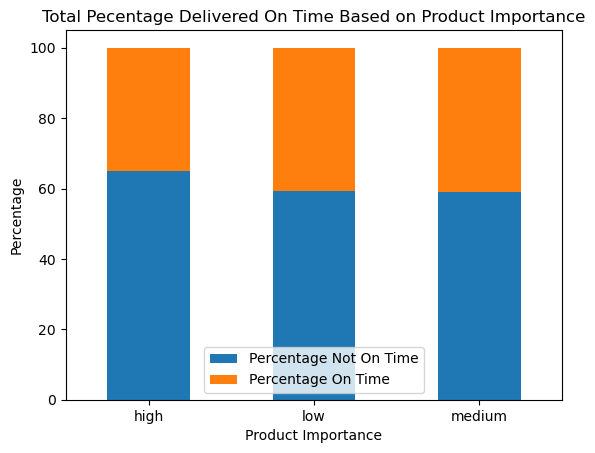

In [77]:
ax = df_shipping_by_prod_import[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered On Time Based on Product Importance')
plt.xlabel('Product Importance')
plt.xticks(rotation=0)
plt.ylabel('Percentage');

Dari grafik stacked barplot diatas, dapat dikatakan bahwa :
- Proporsi barang yang sampai tepat waktu dan barang yang sampai tidak tepat waktu memiliki proporsi kurang berimbang pada Product Importance yang High. Namun untuk product importance low dan medium, proporsinya berimbang.
- Proporsi barang yang sampai tidak tepat waktu product importance high 65 % , proporsi barang yang sampai tepat waktu sekitar 35 %.
- Barang-barang yang berkategori high lebih banyak yang tidak tepat waktu pengirimannya. Sesuai dengan uji statistik yang kita lakukan sebelumnya bahwa product importance memiliki keterkaitan dengan pengiriman barang tepat waktu atau tidak.

In [78]:
df[(df['Product_importance']=='high')&(df['Reached.on.Time_Y.N']==1)].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,616.00000,616.000000,616.000000,616.000000,616.000000,616.000000,616.0
mean,3.86526,2.995130,201.899351,3.573052,19.764610,3583.452922,1.0
std,1.02316,1.439843,46.330516,1.884775,19.602093,1538.839469,0.0
min,2.00000,1.000000,96.000000,2.000000,1.000000,1007.000000,1.0
25%,3.00000,2.000000,165.000000,2.000000,5.000000,2060.500000,1.0
50%,4.00000,3.000000,202.000000,3.000000,9.000000,3798.000000,1.0
75%,5.00000,4.000000,241.000000,4.000000,34.250000,4948.000000,1.0
max,7.00000,5.000000,306.000000,10.000000,65.000000,6000.000000,1.0


### Gender vs Reached.on.Time_Y.N

In [79]:
df_delivery_by_gender=df.groupby(['Gender']).sum()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Number Not On Time'}).join(df.groupby(['Gender']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'}))
df_delivery_by_gender

,Number Not On Time,Total Shipping
Gender,,
F,3296,5545
M,3267,5454


In [80]:
df_delivery_by_gender['Number On Time']=df_delivery_by_gender['Total Shipping']-df_delivery_by_gender['Number Not On Time']
df_delivery_by_gender[['Number Not On Time','Number On Time','Total Shipping']]

,Number Not On Time,Number On Time,Total Shipping
Gender,,,
F,3296,2249,5545
M,3267,2187,5454


In [81]:
df_delivery_by_gender['Percentage Not On Time']=df_delivery_by_gender['Number Not On Time']/df_delivery_by_gender['Total Shipping']*100
df_delivery_by_gender['Percentage On Time']=df_delivery_by_gender['Number On Time']/df_delivery_by_gender['Total Shipping']*100
df_delivery_by_gender

,Number Not On Time,Total Shipping,Number On Time,Percentage Not On Time,Percentage On Time
Gender,,,,,
F,3296,5545,2249,59.440938,40.559062
M,3267,5454,2187,59.900990,40.099010


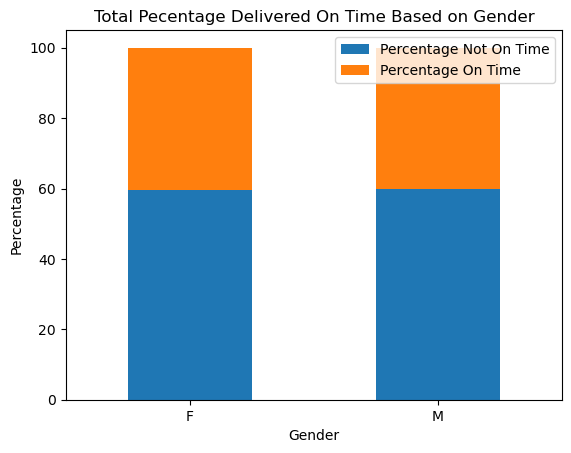

In [82]:
ax = df_delivery_by_gender[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered On Time Based on Gender')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Percentage');

Dari grafik stacked barplot diatas, dapat dikatakan bahwa :
- Proporsi barang yang sampai tepat waktu dan barang yang sampai tidak tepat waktu memiliki proporsi yang berimbang pada kedua jenis kelamin pelanggan.
- Proporsi barang yang sampai tidak tepat waktu sekitar 59 % , proporsi barang yang sampai tepat waktu sekitar 41 %
- Sesuai dengan proporsi persebaran data Reached on time yang kita sudah hitung sebelumnya. Proporsi barang yang sampai tepat waktu adalah 40,3 % dan proporsi barang yang sampai tidak tepat waktu 59,7%

**Berdasarkan ini, dapat dikatakan bahwa : barang dengan product importance high memiliki pengiriman yang sampai tidak tepat waktu lebih besar**

Lalu kita lanjutkan ke pengujian statistik untuk melihat apakah variabel kategorikal ini memiliki keterkaitan dengan var reached on time

## Uji keterkaitan antara variable categorical dengan variable reached on time. 

Mari kita melakukan uji keterkaitan antara variable categorical dengan variable reached on time.  Uji yang digunakan adalah Chi Square Test. Chi Square Test digunakan untuk menguji apakah ada independecy / keterkaitan dari dua variable categorical. Ada 4 variabel categorical yang akan dibandingkan dengan variable Reached on Time. Dilakukannya uji ini untuk mengetahui apakah ada keterkaitan dari variabel lainnya dengan variabel Reached on Time. 

Untuk langkah-langkah ada dibawah ini :

### Chi Square Test Warehouse Block vs Reached on Time

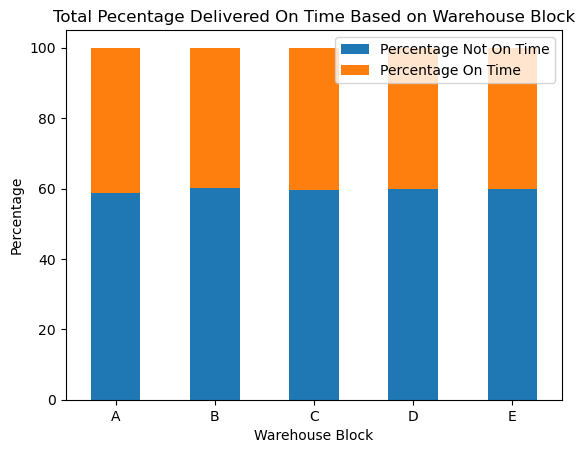

In [83]:
ax = df_shipping_by_warehouse[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered On Time Based on Warehouse Block')
plt.xlabel('Warehouse Block')
plt.xticks(rotation=0)
plt.ylabel('Percentage');

Berikut adalah grafik proposi warehouse berdasarkan Reached on time. Akan dilakukan uji statistik untuk melihat apakah ada ketertaikannya.

Hypothesis:
- Ho: Warehouse block dan Reached on Time tidak terkait/independent (proporsinya sama)
- Ha: Warehouse block dan Reached on Time terkait/dependent (proporsinya berbeda signifikan)

In [84]:
df_pivot_1 = df.pivot_table(
    index='Reached.on.Time_Y.N',
    columns='Warehouse_block',
    values='Customer_rating',
    aggfunc=len
)
df_pivot_1

Warehouse_block,A,B,C,D,E
Reached.on.Time_Y.N,,,,,
0,758,729,739,738,1472
1,1075,1104,1094,1096,2194


In [85]:
from scipy.stats import chi2_contingency


In [86]:
stat,pvalue, dof, expected = chi2_contingency(df_pivot_1)
pvalue

0.8959524278243698

In [87]:
# conclusion

if pvalue > 0.05: # Ho
    print(f''' 
    pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa
    Warehouse block dan Reached on time terkait/dependent.
    (Proporsinya tidak berbeda signifikan)
    ''')

else: # Ha
    print(f''' 
    pvalue = {pvalue}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa
    Warehouse block dan Reached on time terkait/dependent.
    (Proporsinya berbeda signifikan)
    ''')

 
    pvalue = 0.8959524278243698. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa
    Warehouse block dan Reached on time terkait/dependent.
    (Proporsinya tidak berbeda signifikan)
    


Berdasarkan hasil uji chi square dapat ditarik kesimpulan bahwa pada data Online Retail Shipping, variable warehouse block dengan variable reached on time memiliki proporsi yang tidak sama atau tidak terkait (independent)

### Chi Square Test Mode of Shipment vs Reached on Time

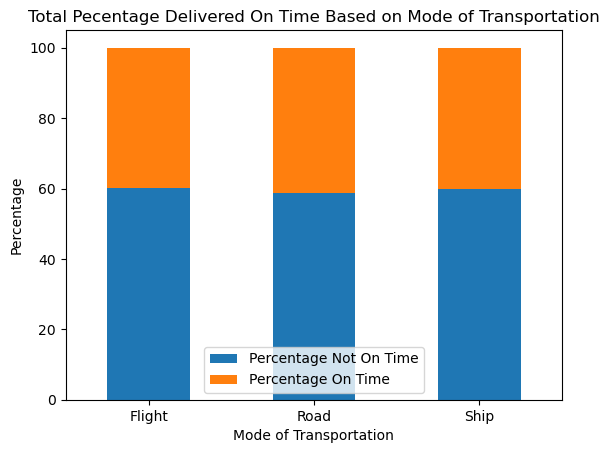

In [88]:
ax = df_delivery_shipping[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered On Time Based on Mode of Transportation')
plt.xticks(rotation=0)
plt.xlabel('Mode of Transportation')
plt.ylabel('Percentage');

Berikut adalah grafik proposi Mode of Transportation berdasarkan Reached on time. Akan dilakukan uji statistik untuk melihat apakah ada ketertaikannya.

Hypothesis:
- Ho: Mode of Shipment dan Reached on Time tidak terkait/independent (proporsinya sama)
- Ha: Mode of Shipment dan Reached on Time terkait/dependent (proporsinya berbeda signifikan)

In [89]:
df_pivot_1 = df.pivot_table(
    index='Reached.on.Time_Y.N',
    columns='Mode_of_Shipment',
    values='Customer_rating',
    aggfunc=len
)
df_pivot_1

Mode_of_Shipment,Flight,Road,Ship
Reached.on.Time_Y.N,,,
0,708,725,3003
1,1069,1035,4459


In [90]:
stat,pvalue, dof, expected = chi2_contingency(df_pivot_1)
pvalue

0.6895487627593786

In [91]:
# conclusion

if pvalue > 0.05: # Ho
    print(f''' 
    pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa
    Mode of Shipment dan Reached on time terkait/dependent.
    (Proporsinya tidak berbeda signifikan)
    ''')

else: # Ha
    print(f''' 
    pvalue = {pvalue}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa
    Mode of Shipment dan Reached on time terkait/dependent.
    (Proporsinya berbeda signifikan)
    ''')

 
    pvalue = 0.6895487627593786. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa
    Mode of Shipment dan Reached on time terkait/dependent.
    (Proporsinya tidak berbeda signifikan)
    


Berdasarkan hasil uji chi square dapat ditarik kesimpulan bahwa pada data Online Retail Shipping, variable mode of shipment dengan variable reached on time memiliki proporsi yang tidak sama atau tidak terkait (independent)

### Chi Square Test Product Importance vs Reached on Time

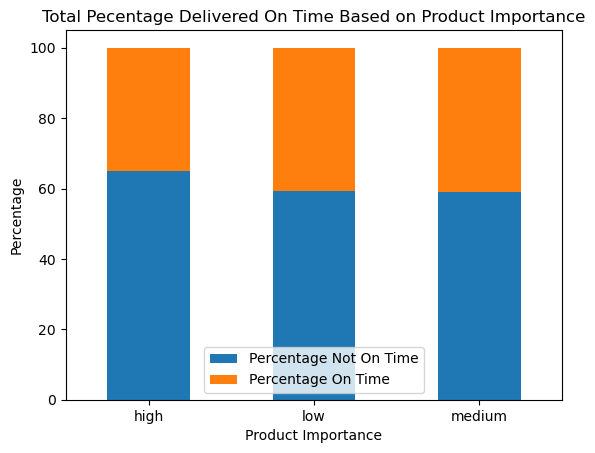

In [92]:
ax = df_shipping_by_prod_import[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered On Time Based on Product Importance')
plt.xlabel('Product Importance')
plt.xticks(rotation=0)
plt.ylabel('Percentage');

Berikut adalah grafik proposi product importance berdasarkan Reached on time. Akan dilakukan uji statistik untuk melihat apakah ada ketertaikannya.

Hypothesis:
- Ho: Product Importance dan Reached on Time tidak terkait/independent (proporsinya sama)
- Ha: Product Importance dan Reached on Time terkait/dependent (proporsinya berbeda signifikan)

In [93]:
df_pivot_1 = df.pivot_table(
    index='Reached.on.Time_Y.N',
    columns='Product_importance',
    values='Customer_rating',
    aggfunc=len
)
df_pivot_1

Product_importance,high,low,medium
Reached.on.Time_Y.N,,,
0,332,2157,1947
1,616,3140,2807


In [94]:
stat,pvalue, dof, expected = chi2_contingency(df_pivot_1)
pvalue

0.002230383104745087

In [95]:
# conclusion

if pvalue > 0.05: # Ho
    print(f''' 
    pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa
    Product Importance dan Reached on time terkait/dependent.
    (Proporsinya tidak berbeda signifikan)
    ''')

else: # Ha
    print(f''' 
    pvalue = {pvalue}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa
    Product Importance dan Reached on time terkait/dependent.
    (Proporsinya berbeda signifikan)
    ''')

 
    pvalue = 0.002230383104745087. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa
    Product Importance dan Reached on time terkait/dependent.
    (Proporsinya berbeda signifikan)
    


Berdasarkan hasil uji chi square dapat ditarik kesimpulan bahwa pada data Online Retail Shipping, variable product importance dengan variable reached on time memiliki proporsi berbeda signifikan atau terkait (dependent)

### Chi Square Test Gender vs Reached on Time

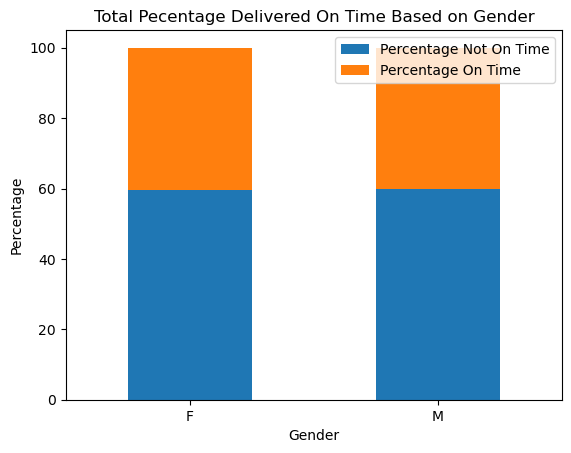

In [96]:
ax = df_delivery_by_gender[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered On Time Based on Gender')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Percentage');

Berikut adalah grafik proposi gender berdasarkan Reached on time. Akan dilakukan uji statistik untuk melihat apakah ada ketertaikannya.

Hypothesis:
- Ho: Gender dan Reached on Time tidak terkait/independent (proporsinya sama)
- Ha: Gender dan Reached on Time terkait/dependent (proporsinya berbeda signifikan)

In [97]:
df_pivot_1 = df.pivot_table(
    index='Reached.on.Time_Y.N',
    columns='Gender',
    values='Customer_rating',
    aggfunc=len
)
df_pivot_1

Gender,F,M
Reached.on.Time_Y.N,,
0,2249,2187
1,3296,3267


In [98]:
stat,pvalue, dof, expected = chi2_contingency(df_pivot_1)
pvalue

0.6367032124181522

In [99]:
# conclusion

if pvalue > 0.05: # Ho
    print(f''' 
    pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa
    Gender dan Reached on time terkait/dependent.
    (Proporsinya tidak berbeda signifikan)
    ''')

else: # Ha
    print(f''' 
    pvalue = {pvalue}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa
    Gender dan Reached on time terkait/dependent.
    (Proporsinya berbeda signifikan)
    ''')

 
    pvalue = 0.6367032124181522. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa
    Gender dan Reached on time terkait/dependent.
    (Proporsinya tidak berbeda signifikan)
    


Berdasarkan hasil uji chi square dapat ditarik kesimpulan bahwa pada data Online Retail Shipping, variable gender dengan variable reached on time memiliki proporsi yang tidak sama atau tidak terkait (independent)

**Dari keempat kategorikal, hanya ada 1 variable kategorical yang memiliki ketertaikatan dengan variabel reached on time yaitu variable product importance. Hasil analisa sebelumnya juga bahwa proporsi yang berbeda terdapat pada var product importance high**

In [100]:
num_feature


['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

In [101]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [102]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,E,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Numerical Variable With Var Reached On Time

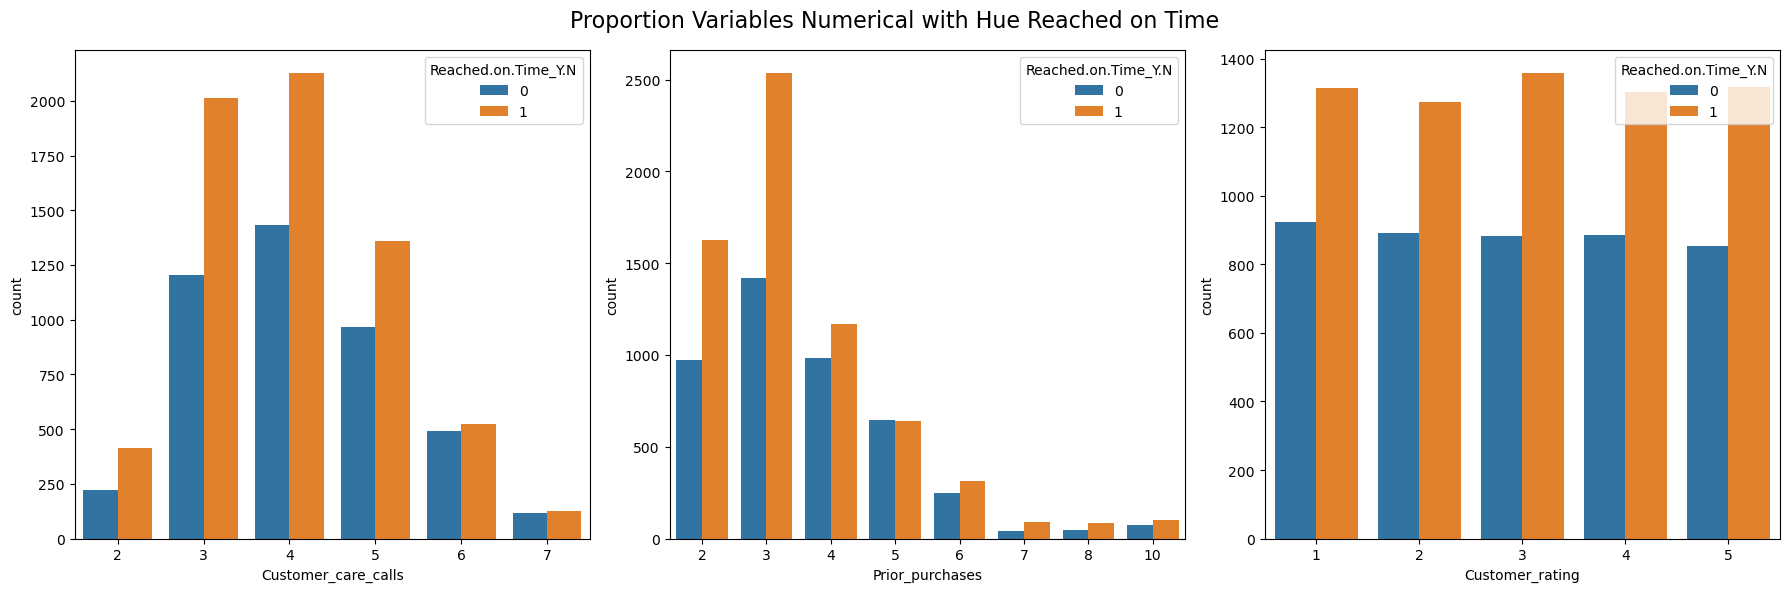

In [103]:
plt.figure(figsize=(18,6))


plt.subplot(1,3,1)
sns.countplot(data=df, x='Customer_care_calls', hue='Reached.on.Time_Y.N')

plt.subplot(1,3,2)
sns.countplot(data=df, x='Prior_purchases', hue='Reached.on.Time_Y.N')


plt.subplot(1,3,3)
sns.countplot(data=df, x='Customer_rating', hue='Reached.on.Time_Y.N')
plt.suptitle('Proportion Variables Numerical with Hue Reached on Time', fontsize=16)

plt.tight_layout()

Dari grafik barplot diatas, dapat dikatakan bahwa :
- Pada grafik customer care calls, proporsi barang sampai tepat waktu dan barang sampai tidak tepat waktu hampir sama (50 : 50) untuk jumlah panggilan yang dilakukan 6 dan 7 kali. Sedangkan untuk jumlah panggilan dibawah 6, secara visual memiliki proporsi barang sampai tidak tepat waktu lebih besar jauh dibanding dengan barang sampai tepat waktu.
- Pada grafik prior purchases, proporsi barang sampai tepat waktu dan barang sampai tidak tepat waktu hampir sama (50:50) untuk jumlah prior purchases 5. Sedangkan untuk jumlah prior purcahses selain 5, secara visual memiliki proporsi barang sampai tidak tepat waktu lebih besar jauh dibanding dengan barang sampai tepat waktu.
- Pada grafik customer rating, proporsi barang sampai tidak tepat waktu lebih besar jauh daripada dibanding barang sampai tepat waktu pada semua nilai customer rating

Untuk grafik discount offered, nilai value discount sangat banyak maka dilakukan binning terlebih dahulu untuk memudahkan visualisasi

In [104]:
df['Discount_offered'].describe()

count    10999.000000
mean     13.373216   
std      16.205527   
min      1.000000    
25%      4.000000    
50%      7.000000    
75%      10.000000   
max      65.000000   
Name: Discount_offered, dtype: float64

Kategori diskon dikelompokkan dalam rentang 10 %

In [105]:
df_new=df.copy()
for i in range(len(df_new)):
    if df_new ['Discount_offered'] [i] <= 10:
        df_new ['Discount_offered'] [i] = '0-10 %'
    elif df_new ['Discount_offered'] [i] <= 20:
        df_new ['Discount_offered'] [i] = '11-20 %'
    elif df_new ['Discount_offered'] [i] <= 30:
        df_new ['Discount_offered'] [i] = '21-30 %'
    elif df_new ['Discount_offered'] [i] <= 40:
        df_new ['Discount_offered'] [i] = '31-40 %'
    elif df_new ['Discount_offered'] [i] <= 50:
        df_new ['Discount_offered'] [i] = '41-50 %'
    elif df_new ['Discount_offered'] [i] <= 60:
        df_new ['Discount_offered'] [i] = '51-60 %'
    elif df_new ['Discount_offered'] [i] <= 65:
        df_new ['Discount_offered'] [i] = '61-65 %'    
df_new['Discount_offered'].value_counts()

0-10 %     8352
41-50 %    507 
51-60 %    499 
11-20 %    496 
31-40 %    470 
21-30 %    441 
61-65 %    234 
Name: Discount_offered, dtype: int64

In [106]:
df_new = df_new.sort_values('Discount_offered', ascending=True)
df_new


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
5499,B,Ship,6,4,256,4,low,F,0-10 %,1676,0
7327,E,Ship,3,3,165,2,low,M,0-10 %,5813,0
7328,A,Ship,4,3,183,2,medium,F,0-10 %,5690,1
7329,B,Ship,4,5,135,3,low,M,0-10 %,5013,0
7330,C,Ship,4,1,200,3,low,M,0-10 %,4686,0
...,...,...,...,...,...,...,...,...,...,...,...
1581,B,Ship,5,1,167,2,low,M,61-65 %,1884,1
1582,C,Ship,3,3,143,3,low,M,61-65 %,1630,1
2705,E,Ship,3,3,253,5,low,F,61-65 %,3788,1
631,E,Ship,3,2,233,3,low,M,61-65 %,2143,1


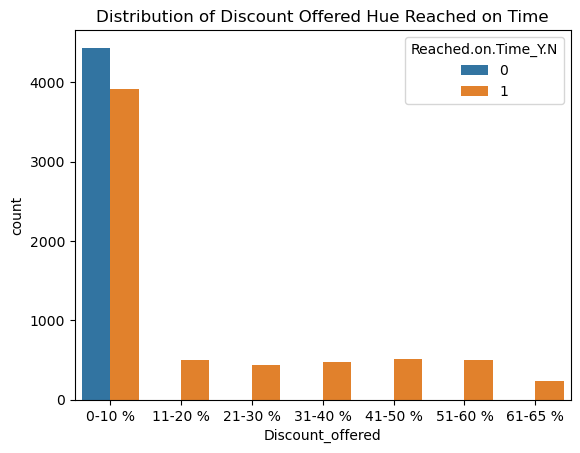

In [107]:
sns.countplot(data=df_new, x='Discount_offered', hue='Reached.on.Time_Y.N')
plt.title('Distribution of Discount Offered Hue Reached on Time')
plt.show()

Berdasarkan grafik barplot diatas, dapat dikatakan bahwa :
- Pada rentang diskon 0-10%, lebih banyak jumlah barang sampai tepat waktu dibanding dengan jumlah barang sampai tidak tepat waktu
- Selain rentang diskon 0-10%, tidak ada barang yang sampai tepat waktu. Berdasarkan dataset ini, kita tidak bisa menggali lebih dalam kenapa barang yang didiskon lebih besar dari 10 % mengalami keterlambatan dalam pengiriman karena kekurangannya data atau variabel lainnya. Asumsi seperti diskon yang besar diberi saat masa liburan yang mengakibatkan lonjakan pesanan. Jika jumlah armada tetap sama seperti sebelumnya, peluang untuk terjadi keterlambatan pengiriman sangatlah besar ketika terjadi lonjakan pesanan.

Mari kita lihat persebaran jumlah data untuk nilai diskon lebih kecil dari 10 %

In [108]:
df[df['Discount_offered']<=10]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,B,Flight,3,3,176,4,medium,M,10,1177,1
6,D,Flight,3,4,250,3,low,F,3,2371,1
12,D,Flight,3,5,198,3,medium,F,1,3667,1
16,C,Flight,3,4,143,2,medium,F,6,1194,1
22,C,Ship,2,5,156,2,low,M,2,1750,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,E,Ship,5,2,223,6,medium,M,2,1210,0


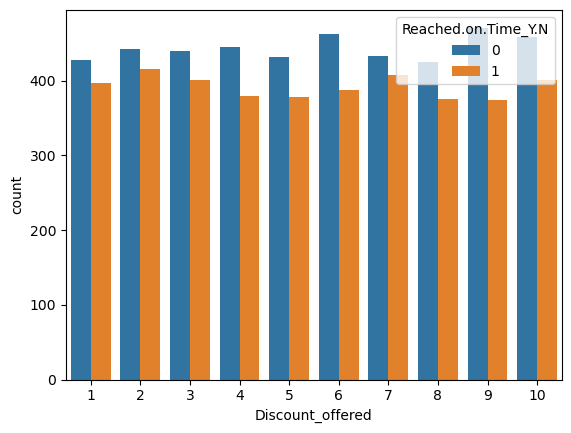

In [109]:
sns.countplot(data=df[df['Discount_offered']<=10], x='Discount_offered', hue='Reached.on.Time_Y.N')
plt.show()

Berdasarkan grafik barplot diatas, dapat dikatakan bahwa :
- Untuk nilai diskon 1 - 10 memiliki jumlah barang sampai tepat waktu lebih banyak dibanding jumlah barang sampai tidak tepat waktu

Sama seperti discount offered, var weight in gms memiliki banyak nilai. Maka dilakukan binning terlebih dahulu untuk memudahkan visualisasi

In [110]:
df['Weight_in_gms'].describe()

count    10999.000000
mean     3634.016729 
std      1635.377251 
min      1001.000000 
25%      1839.500000 
50%      4149.000000 
75%      5050.000000 
max      7846.000000 
Name: Weight_in_gms, dtype: float64

Kategori weight in gms dibagi menjadi rentang per 1000

In [111]:
for i in range(len(df_new)):
    if df_new ['Weight_in_gms'] [i] <= 2000:
        df_new ['Weight_in_gms'] [i] = '1001-2000'
    elif df_new ['Weight_in_gms'] [i] <= 3000:
        df_new ['Weight_in_gms'] [i] = '2001-3000'
    elif df_new ['Weight_in_gms'] [i] <= 4000:
        df_new ['Weight_in_gms'] [i] = '3001-4000'
    elif df_new ['Weight_in_gms'] [i] <= 5000:
        df_new ['Weight_in_gms'] [i] = '4001-5000'
    elif df_new ['Weight_in_gms'] [i] <= 6000:
        df_new ['Weight_in_gms'] [i] = '5001-6000'
    elif df_new ['Weight_in_gms'] [i] <= 7000:
        df_new ['Weight_in_gms'] [i] = '6001-7000'
    elif df_new ['Weight_in_gms'] [i] <= 8000:
        df_new ['Weight_in_gms'] [i] = '7001-8000'    
df_new['Weight_in_gms'].value_counts()

1001-2000    3245
4001-5000    3077
5001-6000    2881
2001-3000    899 
3001-4000    889 
7001-8000    5   
6001-7000    3   
Name: Weight_in_gms, dtype: int64

In [112]:
df_new = df_new.sort_values('Weight_in_gms', ascending=True)


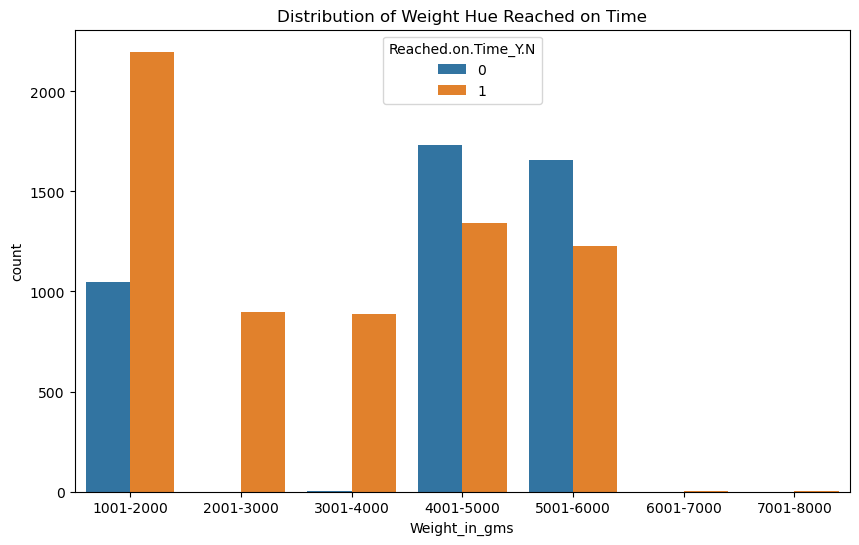

In [113]:
plt.figure(figsize=(10,6))

sns.countplot(data=df_new, x='Weight_in_gms', hue='Reached.on.Time_Y.N')
plt.title('Distribution of Weight Hue Reached on Time')
plt.show()

Berdasarkan grafik barplot diatas, dapat dikatakan bahwa :
- Pada rentang berat produk 1001-2000, lebih banyak barang yang sampai tidak tepat waktu. Jumlah barang yang tidak tepat waktu 2x dari jumlah barang yang tepat waktu
- Pada rentang berat produk 2001-3000, semua barang sampai tidak tepat waktu.
- Pada rentang berat produk 3001-4000, kebanyakan barang sampai tidak tepat waktu.
- Pada rentang berat produk 40001-5000 dan 5001-6000, lebih banyak barang sampai tepat waktu dibanding dengan barang yang sampai tidak tepat waktu.
- Untuk rentang berat > 6000, hanya terdapat sedikit dan semua barang sampai tidak tepat waktu

Sama seperti sebelumnya, var cost of the product memiliki banyak nilai. Maka dilakukan binning terlebih dahulu untuk memudahkan visualisasi

In [114]:
df['Cost_of_the_Product'].describe()

count    10999.000000
mean     210.196836  
std      48.063272   
min      96.000000   
25%      169.000000  
50%      214.000000  
75%      251.000000  
max      310.000000  
Name: Cost_of_the_Product, dtype: float64

Kategori weight in gms dibagi menjadi rentang per 1000

In [115]:
for i in range(len(df_new)):
    if df_new ['Cost_of_the_Product'] [i] <= 150:
        df_new ['Cost_of_the_Product'] [i] = '090-100'
    elif df_new ['Cost_of_the_Product'] [i] <= 200:
        df_new ['Cost_of_the_Product'] [i] = '151-200'
    elif df_new ['Cost_of_the_Product'] [i] <= 250:
        df_new ['Cost_of_the_Product'] [i] = '201-250'
    elif df_new ['Cost_of_the_Product'] [i] <= 300:
        df_new ['Cost_of_the_Product'] [i] = '251-300'
    elif df_new ['Cost_of_the_Product'] [i] <= 350:
        df_new ['Cost_of_the_Product'] [i] = '301-350'  
df_new['Cost_of_the_Product'].value_counts()

201-250    3560
151-200    3156
251-300    2624
090-100    1505
301-350    154 
Name: Cost_of_the_Product, dtype: int64

In [116]:
df_new = df_new.sort_values('Cost_of_the_Product', ascending=True)


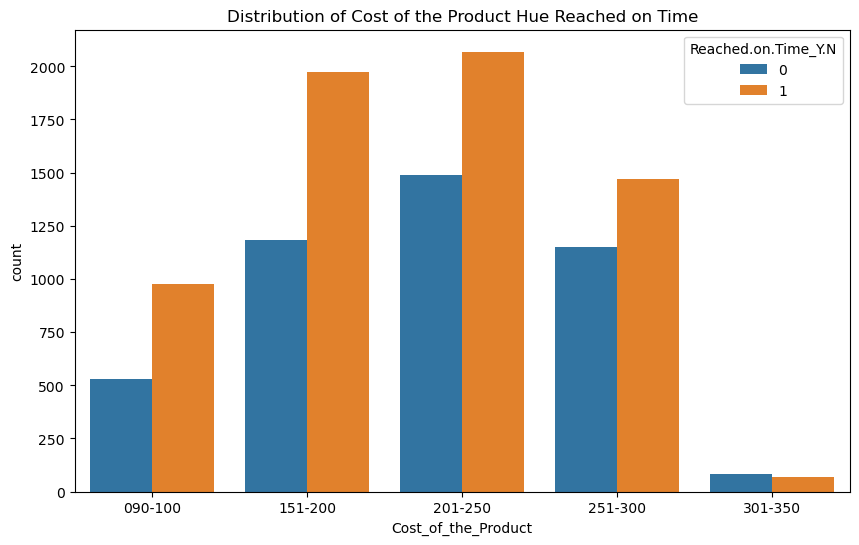

In [117]:
plt.figure(figsize=(10,6))

sns.countplot(data=df_new, x='Cost_of_the_Product', hue='Reached.on.Time_Y.N')
plt.title('Distribution of Cost of the Product Hue Reached on Time')
plt.show()

Berdasarkan grafik barplot diatas, dapat dikatakan bahwa :
- Pada harga produk 90-300, proporsi barang sampai tidak tepat waktu dengan barang sampai tepat waktu memiliki proposi yang sama. Jumlah produk sampai tidak tepat waktu lebih banyak daripada produk sampai tepat waktu
- Pada harga produk diatas 300,terdapat lebih banyak barang sampai tepat waktu dibandingkan barang sampai tidak tepat waktu

## Persentase Variable Numerical dengan Variable Reached on Time

In [118]:
df_delivery_by_cust_calls=df.groupby(['Customer_care_calls']).sum()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Number Not On Time'}).join(df.groupby(['Customer_care_calls']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'}))
df_delivery_by_cust_calls

,Number Not On Time,Total Shipping
Customer_care_calls,,
2,416,638
3,2011,3217
4,2126,3557
5,1360,2328
6,523,1013
7,127,246


In [119]:
df_delivery_by_cust_calls['Number On Time']=df_delivery_by_cust_calls['Total Shipping']-df_delivery_by_cust_calls['Number Not On Time']
df_delivery_by_cust_calls[['Number Not On Time','Number On Time','Total Shipping']]

,Number Not On Time,Number On Time,Total Shipping
Customer_care_calls,,,
2,416,222,638
3,2011,1206,3217
4,2126,1431,3557
5,1360,968,2328
6,523,490,1013
7,127,119,246


In [120]:
df_delivery_by_cust_calls['Percentage Not On Time']=df_delivery_by_cust_calls['Number Not On Time']/df_delivery_by_cust_calls['Total Shipping']*100
df_delivery_by_cust_calls['Percentage On Time']=df_delivery_by_cust_calls['Number On Time']/df_delivery_by_cust_calls['Total Shipping']*100
df_delivery_by_cust_calls

,Number Not On Time,Total Shipping,Number On Time,Percentage Not On Time,Percentage On Time
Customer_care_calls,,,,,
2,416,638,222,65.203762,34.796238
3,2011,3217,1206,62.511657,37.488343
4,2126,3557,1431,59.769469,40.230531
5,1360,2328,968,58.419244,41.580756
6,523,1013,490,51.628825,48.371175
7,127,246,119,51.626016,48.373984


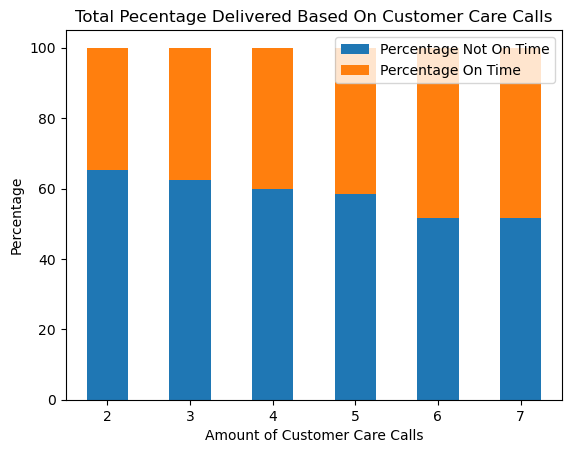

In [121]:
ax = df_delivery_by_cust_calls[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered Based On Customer Care Calls')
plt.xticks(rotation=0)
plt.xlabel('Amount of Customer Care Calls')
plt.ylabel('Percentage');

Dari grafik stacked bar diatas, dapat dikatakan bahwa :
- Pada jumlah panggilan 2 dan 3, persentase barang sampai tidak tepat waktu cenderung lebih besar (62-65%)
- Pada jumlah panggilan 4 dan 5, persentase barang sampai tidak tepat waktu memiliki proporsi yang sama dengan proporsi Reached on time sebenarnya. (58-59%)
- Pada jumlah panggilan 6 dan 7, persentase barang sampai tidak tepat waktu cenderung lebih kecil (51 %)
- Semakin banyak panggilan yang dilakukan pelanggan, makin besar persentase barang sampai tepat waktu. Untuk mengenalisa lebih lanjut, sebaiknya dibutuhkan data pendukung atau variabel lainnya. Bisa diasumsikan, semakin banyak panggilan yg dilakukan maka kelengkapan data pengiriman seperti alamat pengiriman, nama penerima dan no hp penerima semakin lebih jelas dan rinci sehingga bisa mengurangi masalah dalam pengiriman yang dapat menyebabkan keterlambatan


In [122]:
df_delivery_by_prior_purc=df.groupby(['Prior_purchases']).sum()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Number Not On Time'}).join(df.groupby(['Prior_purchases']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'}))
df_delivery_by_prior_purc

,Number Not On Time,Total Shipping
Prior_purchases,,
2,1625,2599
3,2534,3955
4,1171,2155
5,642,1287
6,314,561
7,92,136
8,83,128
10,102,178


In [123]:
df_delivery_by_prior_purc['Number On Time']=df_delivery_by_prior_purc['Total Shipping']-df_delivery_by_prior_purc['Number Not On Time']
df_delivery_by_prior_purc[['Number Not On Time','Number On Time','Total Shipping']]

,Number Not On Time,Number On Time,Total Shipping
Prior_purchases,,,
2,1625,974,2599
3,2534,1421,3955
4,1171,984,2155
5,642,645,1287
6,314,247,561
7,92,44,136
8,83,45,128
10,102,76,178


In [124]:
df_delivery_by_prior_purc['Percentage Not On Time']=df_delivery_by_prior_purc['Number Not On Time']/df_delivery_by_prior_purc['Total Shipping']*100
df_delivery_by_prior_purc['Percentage On Time']=df_delivery_by_prior_purc['Number On Time']/df_delivery_by_prior_purc['Total Shipping']*100
df_delivery_by_prior_purc

,Number Not On Time,Total Shipping,Number On Time,Percentage Not On Time,Percentage On Time
Prior_purchases,,,,,
2,1625,2599,974,62.524048,37.475952
3,2534,3955,1421,64.070796,35.929204
4,1171,2155,984,54.338747,45.661253
5,642,1287,645,49.883450,50.116550
6,314,561,247,55.971480,44.028520
7,92,136,44,67.647059,32.352941
8,83,128,45,64.843750,35.156250
10,102,178,76,57.303371,42.696629


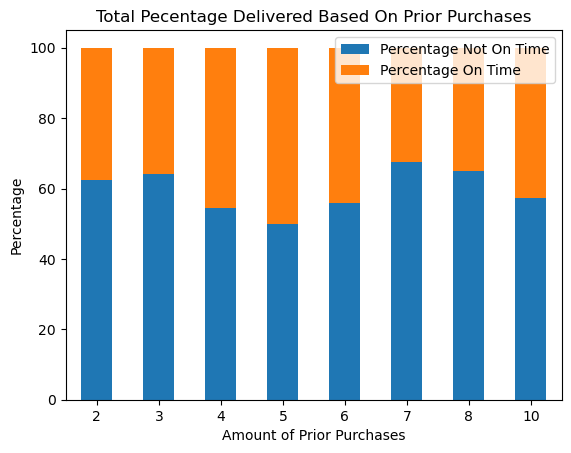

In [125]:
ax = df_delivery_by_prior_purc[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered Based On Prior Purchases')
plt.xticks(rotation=0)
plt.xlabel('Amount of Prior Purchases')
plt.ylabel('Percentage');

Dari grafik stacked bar diatas, dapat dikatakan bahwa :
- Secara keseluruhan, prior purchases memilki variasi data yang beragam atau bisa dikatakan tidak ada polanya.


In [126]:
df_delivery_by_cust_rating=df.groupby(['Customer_rating']).sum()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Number Not On Time'}).join(df.groupby(['Customer_rating']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'}))
df_delivery_by_cust_rating

,Number Not On Time,Total Shipping
Customer_rating,,
1,1313,2235
2,1273,2165
3,1357,2239
4,1303,2189
5,1317,2171


In [127]:
df_delivery_by_cust_rating['Number On Time']=df_delivery_by_cust_rating['Total Shipping']-df_delivery_by_cust_rating['Number Not On Time']
df_delivery_by_cust_rating[['Number Not On Time','Number On Time','Total Shipping']]

,Number Not On Time,Number On Time,Total Shipping
Customer_rating,,,
1,1313,922,2235
2,1273,892,2165
3,1357,882,2239
4,1303,886,2189
5,1317,854,2171


In [128]:
df_delivery_by_cust_rating['Percentage Not On Time']=df_delivery_by_cust_rating['Number Not On Time']/df_delivery_by_cust_rating['Total Shipping']*100
df_delivery_by_cust_rating['Percentage On Time']=df_delivery_by_cust_rating['Number On Time']/df_delivery_by_cust_rating['Total Shipping']*100
df_delivery_by_cust_rating

,Number Not On Time,Total Shipping,Number On Time,Percentage Not On Time,Percentage On Time
Customer_rating,,,,,
1,1313,2235,922,58.747204,41.252796
2,1273,2165,892,58.799076,41.200924
3,1357,2239,882,60.607414,39.392586
4,1303,2189,886,59.524897,40.475103
5,1317,2171,854,60.663289,39.336711


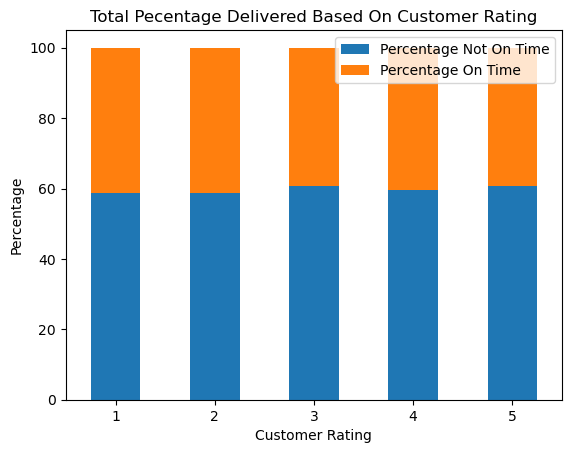

In [129]:
ax = df_delivery_by_cust_rating[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered Based On Customer Rating')
plt.xticks(rotation=0)
plt.xlabel('Customer Rating')
plt.ylabel('Percentage');

Dari grafik stacked bar diatas, dapat dikatakan bahwa :
- Berdasarkan Customer rating, tidak ada perbedaan proporsi dengan proporsi reached on time sebenarnya.

In [130]:
df_delivery_by_disc=df_new.groupby(['Discount_offered']).sum()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Number Not On Time'}).join(df_new.groupby(['Discount_offered']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'}))
df_delivery_by_disc

,Number Not On Time,Total Shipping
Discount_offered,,
0-10 %,3916,8352
11-20 %,496,496
21-30 %,441,441
31-40 %,470,470
41-50 %,507,507
51-60 %,499,499
61-65 %,234,234


In [131]:
df_delivery_by_disc['Number On Time']=df_delivery_by_disc['Total Shipping']-df_delivery_by_disc['Number Not On Time']
df_delivery_by_disc[['Number Not On Time','Number On Time','Total Shipping']]

,Number Not On Time,Number On Time,Total Shipping
Discount_offered,,,
0-10 %,3916,4436,8352
11-20 %,496,0,496
21-30 %,441,0,441
31-40 %,470,0,470
41-50 %,507,0,507
51-60 %,499,0,499
61-65 %,234,0,234


In [132]:
df_delivery_by_disc['Percentage Not On Time']=df_delivery_by_disc['Number Not On Time']/df_delivery_by_disc['Total Shipping']*100
df_delivery_by_disc['Percentage On Time']=df_delivery_by_disc['Number On Time']/df_delivery_by_disc['Total Shipping']*100
df_delivery_by_disc

,Number Not On Time,Total Shipping,Number On Time,Percentage Not On Time,Percentage On Time
Discount_offered,,,,,
0-10 %,3916,8352,4436,46.886973,53.113027
11-20 %,496,496,0,100.000000,0.000000
21-30 %,441,441,0,100.000000,0.000000
31-40 %,470,470,0,100.000000,0.000000
41-50 %,507,507,0,100.000000,0.000000
51-60 %,499,499,0,100.000000,0.000000
61-65 %,234,234,0,100.000000,0.000000


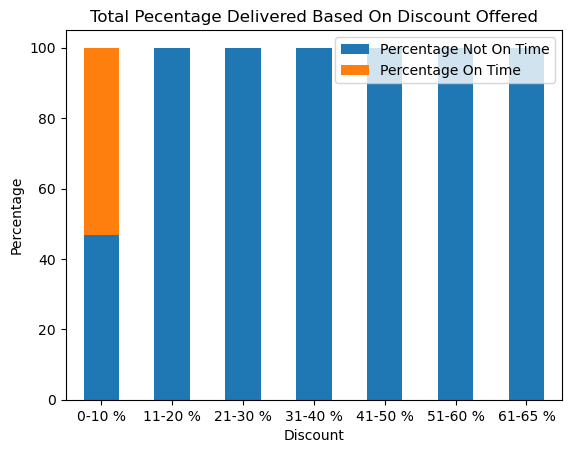

In [133]:
ax = df_delivery_by_disc[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)
plt.title ('Total Pecentage Delivered Based On Discount Offered')
plt.xticks(rotation=0)
plt.xlabel('Discount')
plt.ylabel('Percentage');

Dari grafik stacked bar diatas, dapat dikatakan bahwa :
- Pada rentang diskon 0-10 %, Persentase barang sampai tepat waktu lebih besar dari barang sampai tidak tepat waktu
- Selain rentang diskon 0-10 %, tidak ada barang yang sampai tepat waktu.


In [134]:
df[df['Discount_offered']<=10]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,B,Flight,3,3,176,4,medium,M,10,1177,1
6,D,Flight,3,4,250,3,low,F,3,2371,1
12,D,Flight,3,5,198,3,medium,F,1,3667,1
16,C,Flight,3,4,143,2,medium,F,6,1194,1
22,C,Ship,2,5,156,2,low,M,2,1750,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,E,Ship,5,2,223,6,medium,M,2,1210,0


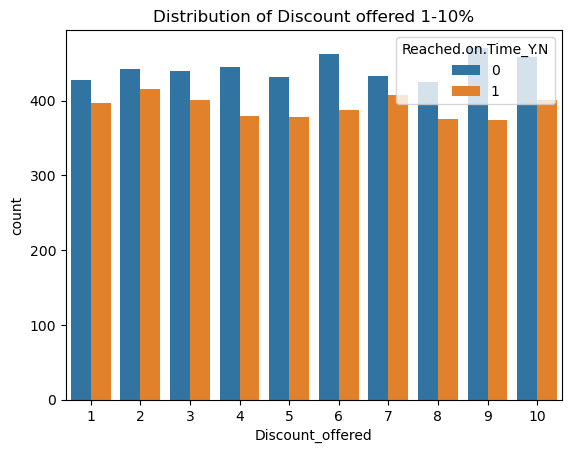

In [135]:
sns.countplot(data=df[df['Discount_offered']<=10], x='Discount_offered', hue='Reached.on.Time_Y.N')
plt.title('Distribution of Discount offered 1-10%')
plt.show()

Persebaran proporsi sampai tepat waktu dan tidak tepat waktu pada diskon 1-10 memiliki proposi yang berimbang.

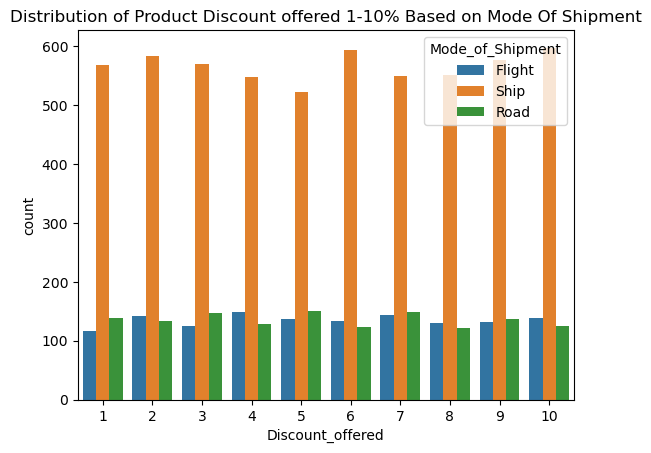

In [157]:
sns.countplot(data=df[df['Discount_offered']<=10], x='Discount_offered', hue='Mode_of_Shipment')
plt.title('Distribution of Product Discount offered 1-10% Based on Mode Of Shipment')
plt.show()

Perbandingan persebaran moda transportasi pada produk yang memiliki nilai diskon 1-10 sama semua.

In [136]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,E,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


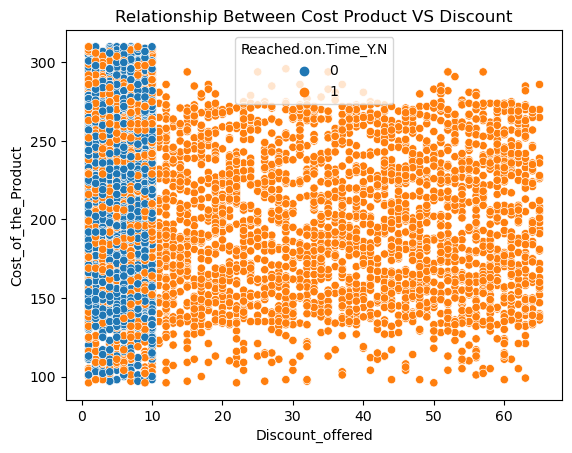

In [137]:
sns.scatterplot(data=df,x='Discount_offered',y='Cost_of_the_Product',hue='Reached.on.Time_Y.N')
plt.title('Relationship Between Cost Product VS Discount')
plt.show()

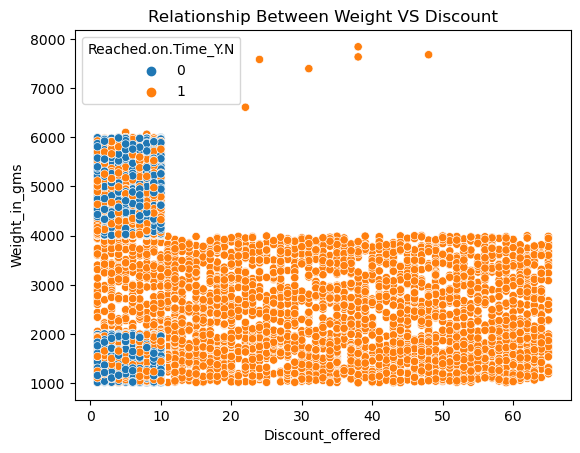

In [138]:
sns.scatterplot(data=df,x='Discount_offered',y='Weight_in_gms',hue='Reached.on.Time_Y.N')
plt.title('Relationship Between Weight VS Discount')
plt.show()



In [139]:
df_delivery_by_weight=df_new.groupby(['Weight_in_gms']).sum()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Number Not On Time'}).join(df_new.groupby(['Weight_in_gms']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'}))
df_delivery_by_weight

,Number Not On Time,Total Shipping
Weight_in_gms,,
1001-2000,2199,3245
2001-3000,899,899
3001-4000,888,889
4001-5000,1344,3077
5001-6000,1225,2881
6001-7000,3,3
7001-8000,5,5


In [140]:
df_delivery_by_weight['Number On Time']=df_delivery_by_weight['Total Shipping']-df_delivery_by_weight['Number Not On Time']
df_delivery_by_weight[['Number Not On Time','Number On Time','Total Shipping']]

,Number Not On Time,Number On Time,Total Shipping
Weight_in_gms,,,
1001-2000,2199,1046,3245
2001-3000,899,0,899
3001-4000,888,1,889
4001-5000,1344,1733,3077
5001-6000,1225,1656,2881
6001-7000,3,0,3
7001-8000,5,0,5


In [141]:
df_delivery_by_weight['Percentage Not On Time']=df_delivery_by_weight['Number Not On Time']/df_delivery_by_weight['Total Shipping']*100
df_delivery_by_weight['Percentage On Time']=df_delivery_by_weight['Number On Time']/df_delivery_by_weight['Total Shipping']*100
df_delivery_by_weight

,Number Not On Time,Total Shipping,Number On Time,Percentage Not On Time,Percentage On Time
Weight_in_gms,,,,,
1001-2000,2199,3245,1046,67.765794,32.234206
2001-3000,899,899,0,100.000000,0.000000
3001-4000,888,889,1,99.887514,0.112486
4001-5000,1344,3077,1733,43.678908,56.321092
5001-6000,1225,2881,1656,42.519958,57.480042
6001-7000,3,3,0,100.000000,0.000000
7001-8000,5,5,0,100.000000,0.000000


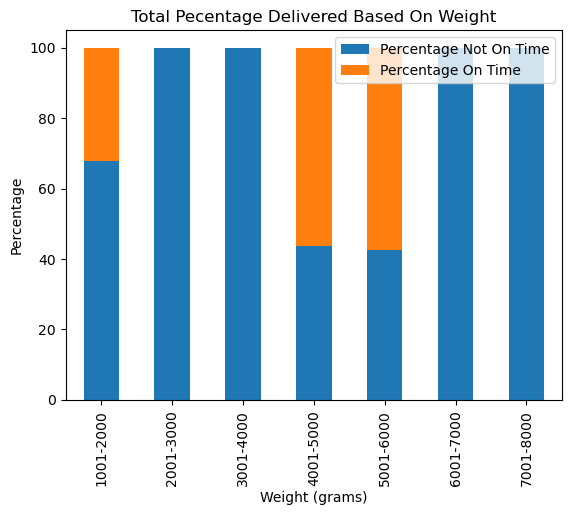

In [142]:
ax = df_delivery_by_weight[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)

plt.title ('Total Pecentage Delivered Based On Weight')
plt.xlabel('Weight (grams)')
plt.ylabel('Percentage');

Dari grafik stacked bar diatas, dapat dikatakan bahwa :
- Pada rentang berat produk 1001-2000 (ringan), lebih banyak barang yang sampai tidak tepat waktu
- Pada rentang berat 2000 - 4000 (sedang) & > 6000 (sangat berat), semua barang sampai tidak tepat waktu
- Pada rentang berat 4000 - 6000 (berat), lebih banyak barang yang sampai tepat waktu


Lalu coba kita lihat metode pengirimannya bedasarkan rentang berat

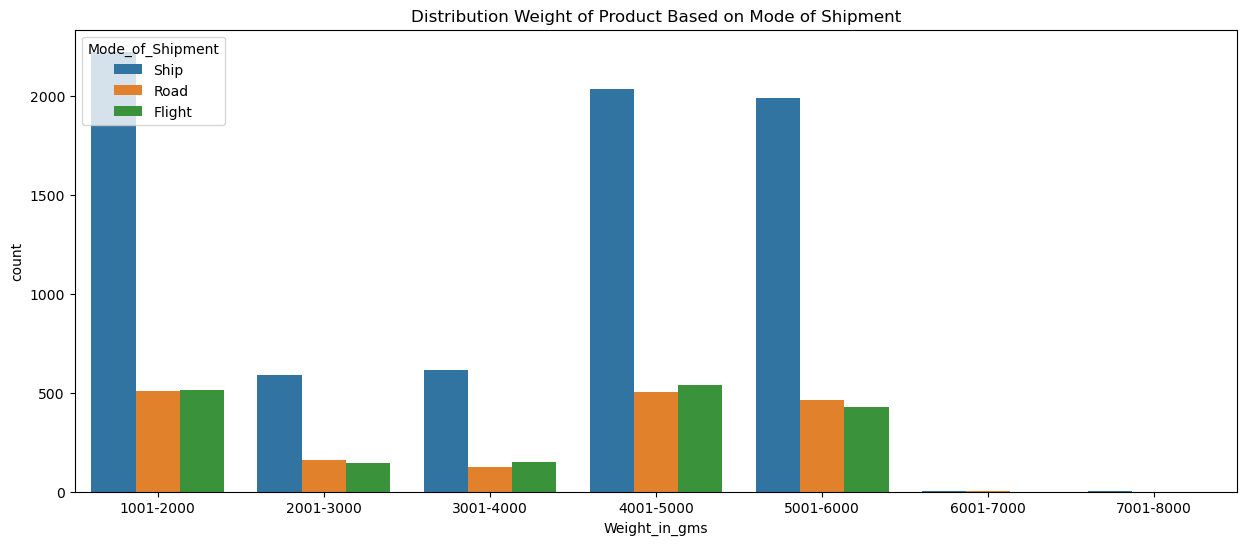

In [155]:
plt.figure(figsize=(15,6))
sns.countplot(
    data=df_new.sort_values('Weight_in_gms',ascending=True),
    x='Weight_in_gms',
    hue='Mode_of_Shipment'
)
plt.title('Distribution Weight of Product Based on Mode of Shipment')
plt.show()


Metode pengiriman yang digunakan untuk semua rentang berat memiliki persebaran yang sama. Dugaan metode pengiriman yang dapat menyebabkan terlambat pada rentang berat sedang (2001-3000) dihilangkan.

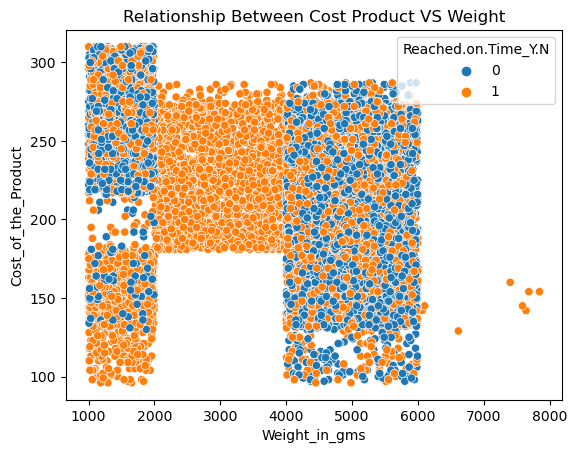

In [144]:
sns.scatterplot(data=df,x='Weight_in_gms',y='Cost_of_the_Product',hue='Reached.on.Time_Y.N')
plt.title('Relationship Between Cost Product VS Weight')
plt.show()


In [145]:
df_delivery_by_cost=df_new.groupby(['Cost_of_the_Product']).sum()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Number Not On Time'}).join(df_new.groupby(['Cost_of_the_Product']).count()[['Reached.on.Time_Y.N']].rename(columns={'Reached.on.Time_Y.N':'Total Shipping'}))
df_delivery_by_cost

,Number Not On Time,Total Shipping
Cost_of_the_Product,,
090-100,977,1505
151-200,1975,3156
201-250,2069,3560
251-300,1472,2624
301-350,70,154


In [146]:
df_delivery_by_cost['Number On Time']=df_delivery_by_cost['Total Shipping']-df_delivery_by_cost['Number Not On Time']
df_delivery_by_cost[['Number Not On Time','Number On Time','Total Shipping']]

,Number Not On Time,Number On Time,Total Shipping
Cost_of_the_Product,,,
090-100,977,528,1505
151-200,1975,1181,3156
201-250,2069,1491,3560
251-300,1472,1152,2624
301-350,70,84,154


In [147]:
df_delivery_by_cost['Percentage Not On Time']=df_delivery_by_cost['Number Not On Time']/df_delivery_by_cost['Total Shipping']*100
df_delivery_by_cost['Percentage On Time']=df_delivery_by_cost['Number On Time']/df_delivery_by_cost['Total Shipping']*100
df_delivery_by_cost

,Number Not On Time,Total Shipping,Number On Time,Percentage Not On Time,Percentage On Time
Cost_of_the_Product,,,,,
090-100,977,1505,528,64.916944,35.083056
151-200,1975,3156,1181,62.579214,37.420786
201-250,2069,3560,1491,58.117978,41.882022
251-300,1472,2624,1152,56.097561,43.902439
301-350,70,154,84,45.454545,54.545455


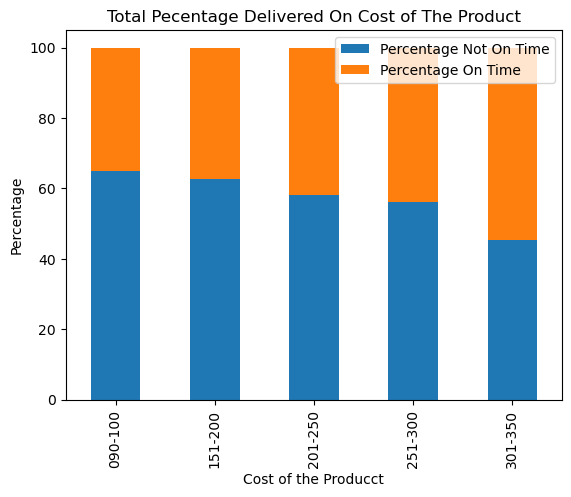

In [148]:
ax = df_delivery_by_cost[['Percentage Not On Time','Percentage On Time']].plot.bar(stacked=True)

plt.title ('Total Pecentage Delivered On Cost of The Product')
plt.xlabel('Cost of the Product')
plt.ylabel('Percentage');

Dari grafik barplot diatas, dapat dikatakan bahwa :
- Pada rentang harga produk 90-200, lebih banyak  barang sampai tidak tepat waktu (persentase 60an%)
- Pada rentang harga produk 201-300, lebih banyak barang sampai tidak tepat waktu (persentase 54-56%)
- Pada rentang harga >300, lebih banyak barang sampai tepat waktu (persentase 54%)

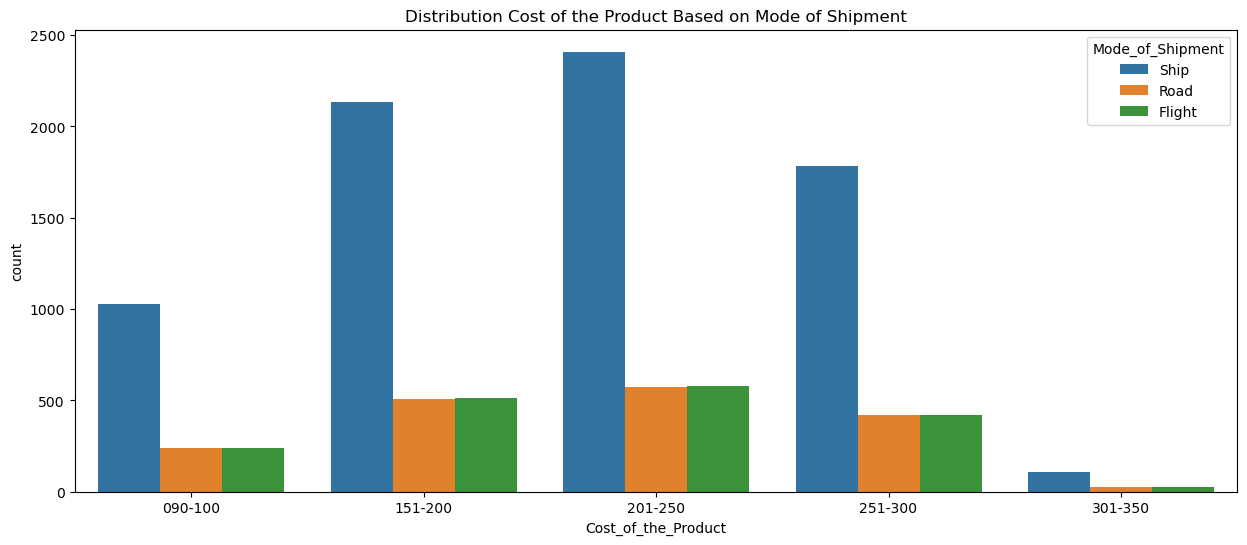

In [159]:
plt.figure(figsize=(15,6))
sns.countplot(
    data=df_new.sort_values('Cost_of_the_Product',ascending=True),
    x='Cost_of_the_Product',
    hue='Mode_of_Shipment'
)
plt.title('Distribution Cost of the Product Based on Mode of Shipment')
plt.show()

Perbandingan persebaran moda transportasi pada semua harga rentang produk ini sama.

In [151]:
df[df['Reached.on.Time_Y.N']==0]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3135,B,Road,6,5,141,3,medium,M,8,5031,0
3136,C,Road,3,3,219,3,low,M,4,5956,0
3137,E,Road,4,3,161,3,high,M,7,4245,0
3138,D,Road,4,5,225,4,medium,M,5,4622,0
3140,A,Road,3,3,256,4,medium,M,3,4732,0
...,...,...,...,...,...,...,...,...,...,...,...
10993,E,Ship,5,1,257,6,low,F,1,1150,0
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,E,Ship,5,2,223,6,medium,M,2,1210,0


# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesilpulan berikut tetang variabel apa saja yang mempengaruhi :
* Dari 10,999 data yang kita miliki, hanya 4436 data pengiriman yang pengirimannya tepat waktu.
* Dalam segi letak penyimpanan barang dalam Warehouse block, kelima lokasi warehouse block memilki proporsi reached on time yang sama dengan proposi reached on time sebenarnya.
* Moda pengiriman yang paling sering digunakan adalah jalur laut / kapal (67% dari data set ini). Persentase proporsi pengiriman sampai tepat waktu hampir sama pada ketiga moda transportasi.
* Dari segi customer care calls, semakin banyak customer care calls semakin besar persentase barang sampai tepat waktu.
* Harga pembuatan produk yang semakin tinggi, cenderung semakin besar peluang pengiriman barang sampai tepat waktu.
* Produk dengan importance tinggi cenderung lebih sering telat sampai ke pembeli. Pembagian kepentingan produk ditentukan oleh perusahaan. Berdasarkan data set ini, kita tidak dinfokan bagaimana ciri-ciri produk yang berkategori high, medium dan low. Diasumsikan seperti barang berkategori high memiliki keuntungan / proft terbesar sedangkan barang berkategori low memberikan profit terkecil. 
* Produk dengan diskon 1-10% lebih banyak persentase tepat waktu namun diskon di atas 10% semua pengiriman tidak tepat waktu. Berdasarkan dataset ini, kita tidak bisa menggali lebih dalam kenapa barang yang didiskon lebih besar dari 10 % mengalami keterlambatan dalam pengiriman karena kekurangannya data atau variabel lainnya. Asumsikan seperti diskon yang besar diberikan oleh perusaahan saat masa lebaran yang mengakibatkan lonjakan pesanan. Jika jumlah jasa pengiriman yang digunakan tetap sama seperti sebelumnya, peluang untuk terjadi keterlambatan pengiriman sangatlah besar ketika terjadi lonjakan pesanan.
* Product dengan berat rentang antar 1000-2000, pengiriman lebih sering tidak tepat waktu. Product dengan rentang antar 4001-6000, pengiriman sering tepat waktu. Product dengan rentang antar 2001-4000 dan 6000-8000, semua pengiriman tidak tepat waktu. Dikategorikan barang antar rentang 1000-2000 termasuk ringan, 2001-4000 termasuk sedang dan > 4000 termasuk berat. Pada kategori sedang mungkin terdapat jumlah quantity yang lebih besar yang dapat menyebabkan keterlambatan.





**Rekomendasi**
1. Dengan mengasumsikan kurangnya jasa pengiriman di saat libur lebaran, perusahaan dapat menambah kerja sama dengan jasa pengiriman lainnya. Dengan bertambahnya jasa pengiriman, diharapkan dapat memperkecil persentase pengiriman produk yang terlambat sampai ke pembeli.
2. Memberi perhatian dan pengamatan lebih lanjut agar pengiriman untuk barang berkategori high bisa menghilangkan keterlambatannya. Seperti dengan memprioritaskan barang berkategori high untuk diproses pengiriman lebih dulu.
3. Bekerja sama dengan jasa pengiriman yang memiliki reputasi baik karena jasa pengiriman yang sekarang bekerja sama dengan perusahaan memiliki proporsi barang sampai tidak tepat waktu cukup lebih besar.